<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 15px; height: 80px">

# Project 2

### Exploratory Data Analysis (EDA)

---

Your hometown mayor just created a new data analysis team to give policy advice, and the administration recruited _you_ via LinkedIn to join it. Unfortunately, due to budget constraints, for now the "team" is just you...

The mayor wants to start a new initiative to move the needle on one of two separate issues: high school education outcomes, or drug abuse in the community.

Also unfortunately, that is the entirety of what you've been told. And the mayor just went on a lobbyist-funded fact-finding trip in the Bahamas. In the meantime, you got your hands on two national datasets: one on SAT scores by state, and one on drug use by age. Start exploring these to look for useful patterns and possible hypotheses!

---

This project is focused on exploratory data analysis, aka "EDA". EDA is an essential part of the data science analysis pipeline. Failure to perform EDA before modeling is almost guaranteed to lead to bad models and faulty conclusions. What you do in this project are good practices for all projects going forward, especially those after this bootcamp!

This lab includes a variety of plotting problems. Much of the plotting code will be left up to you to find either in the lecture notes, or if not there, online. There are massive amounts of code snippets either in documentation or sites like [Stack Overflow](https://stackoverflow.com/search?q=%5Bpython%5D+seaborn) that have almost certainly done what you are trying to do.

**Get used to googling for code!** You will use it every single day as a data scientist, especially for visualization and plotting.

#### Package imports

In [1]:
import numpy as np
import scipy.stats as stats
import csv
import pandas as pd
import seaborn as sns
import matplotlib.lines as mlines
import matplotlib.pyplot as plt
from pprint import pprint 


plt.style.use('seaborn-pastel')

# this line tells jupyter notebook to put the plots in the notebook rather than saving them to file.
%matplotlib inline

# this line makes plots prettier on mac retina screens. If you don't have one it shouldn't do anything.
%config InlineBackend.figure_format = 'retina'

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 1. Load the `sat_scores.csv` dataset and describe it

---

You should replace the placeholder path to the `sat_scores.csv` dataset below with your specific path to the file.

### 1.1 Load the file with the `csv` module and put it in a Python dictionary

The dictionary format for data will be the column names as key, and the data under each column as the values.

Toy example:
```python
data = {
    'column1':[0,1,2,3],
    'column2':['a','b','c','d']
    }
```

In [2]:
satfile = "./sat_scores.csv"

#load raw data
with open(satfile, 'r') as f:
    raw_pd = f.read()

#clean the data
clean1 = raw_pd.splitlines()

cleaned_lines = []
for item in clean1:
        cleaned_lines.append(item.replace('"',''))
        
split_data = []

for line in cleaned_lines:
    split_data.append(line.split(','))

#put the cleaned data into a Python Dictionary
sat_dict = {}#initialise the dictionary

for line in split_data[1:]:#starting from second line
    sat_line = []
    for i,item in enumerate(line):#for each value in column
        
        key = split_data[0][i]#this is the key value or the header of the column

        #update the dictionary
        if(key in sat_dict.keys()):#if key already exists in dictionary
            sat_dict[key].append(item)#add item to the list
        
        else:
            sat_dict[key] = [item]#else, initialise the list with the new key
        

In [3]:
#load the data with read_csv function
sat_scores = pd.read_csv(satfile, encoding='latin-1')


In [4]:
sat_scores.head(10)

,State,Rate,Verbal,Math
0,CT,82,509,510
1,NJ,81,499,513
2,MA,79,511,515
3,NY,77,495,505
4,NH,72,520,516
5,RI,71,501,499
6,PA,71,500,499
7,VT,69,511,506
8,ME,69,506,500
9,VA,68,510,501


### 1.2 Make a pandas DataFrame object with the SAT dictionary, and another with the pandas `.read_csv()` function

Compare the DataFrames using the `.dtypes` attribute in the DataFrame objects. What is the difference between loading from file and inputting this dictionary (if any)?

In [5]:

#with the .read_csv() function
sat_scores.dtypes

State     object
Rate       int64
Verbal     int64
Math       int64
dtype: object

If you did not convert the string column values to float in your dictionary, the columns in the DataFrame are of type `object` (which are string values, essentially). 

### 1.3 Look at the first ten rows of the DataFrame: what does our data describe?

From now on, use the DataFrame loaded from the file using the `.read_csv()` function.

Use the `.head(num)` built-in DataFrame function, where `num` is the number of rows to print out.

You are not given a "codebook" with this data, so you will have to make some (very minor) inference.

In [6]:
#show first ten rows of the DataFrame
sat_scores.head(10)

,State,Rate,Verbal,Math
0,CT,82,509,510
1,NJ,81,499,513
2,MA,79,511,515
3,NY,77,495,505
4,NH,72,520,516
5,RI,71,501,499
6,PA,71,500,499
7,VT,69,511,506
8,ME,69,506,500
9,VA,68,510,501


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 2. Create a "data dictionary" based on the data

---

A data dictionary is an object that describes your data. This should contain the name of each variable (column), the type of the variable, your description of what the variable is, and the shape (rows and columns) of the entire dataset.

In [7]:

#initialise data dictionary
data_dictionary =  {}

#add dictionary entry for name of each variable (column)

for col in sat_scores.columns:
    try: 
        data_dictionary['Variable Name'].append(col)
    except KeyError:
        data_dictionary['Variable Name'] = [col]
        
#describe the type of each variable

data_dictionary['Variable Types'] = sat_scores.dtypes
        
#shape of entire dataset

data_dictionary['Shape'] = sat_scores.shape


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 3. Plot the data using seaborn

---

### 3.1 Using seaborn's `distplot`, plot the distributions for each of `Rate`, `Math`, and `Verbal`

Set the keyword argument `kde=False`. This way you can actually see the counts within bins. You can adjust the number of bins to your liking. 

[Please read over the `distplot` documentation to learn about the arguments and fine-tune your chart if you want.](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.distplot.html#seaborn.distplot)

Text(0.5, 0, 'Rate')

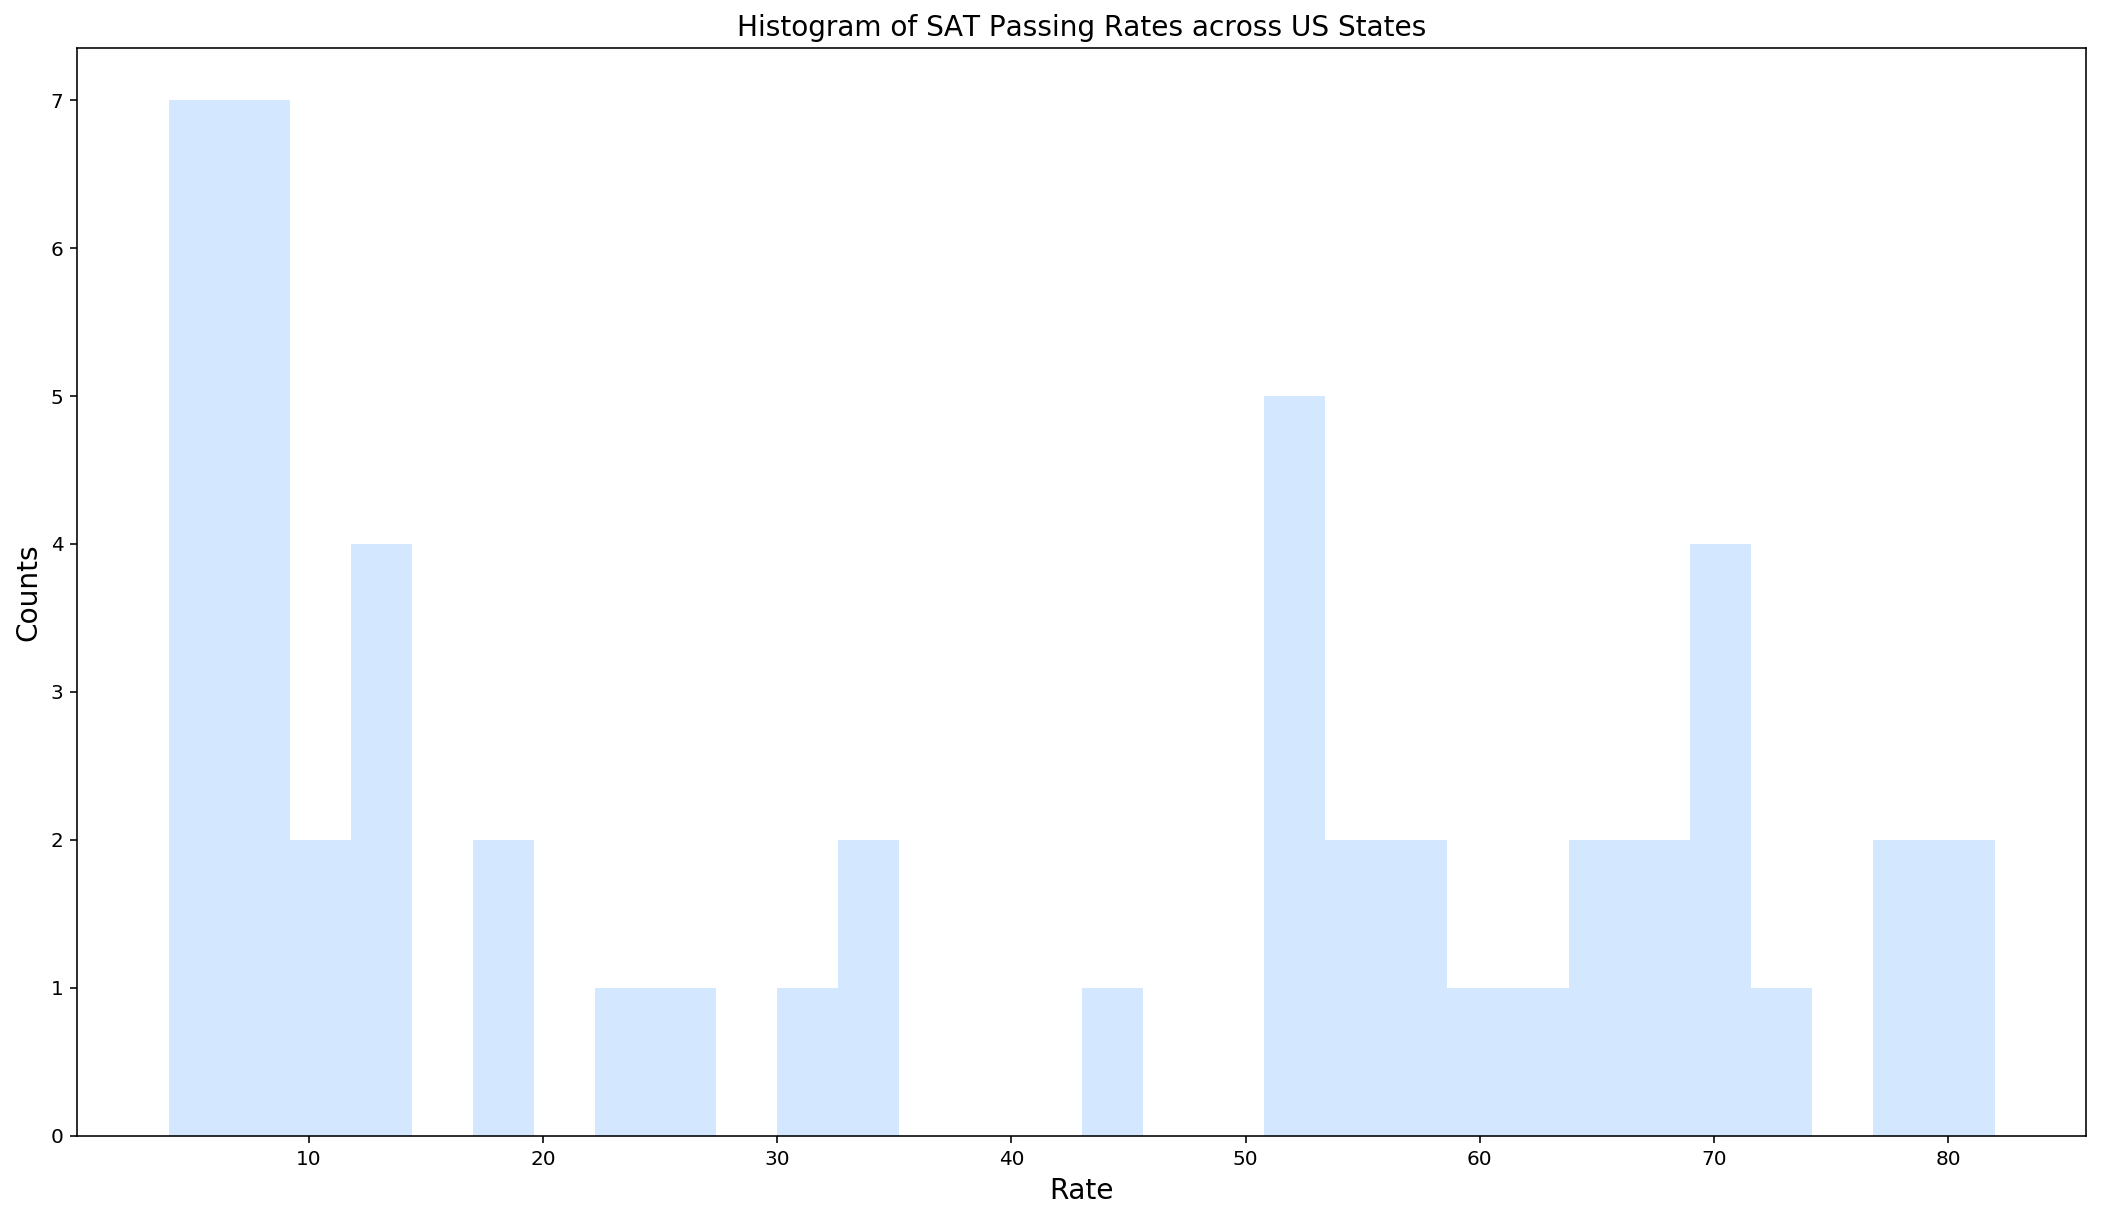

In [8]:

#plot the histogram for SAT Rate

#adjust size of the plot
fig = plt.figure(figsize=(18,10))

sns.distplot(sat_scores.Rate,bins=30,kde=False)

#define titles and axis labels
plt.title('Histogram of SAT Passing Rates across US States',fontsize=14)
plt.ylabel('Counts', fontsize=14)
plt.xlabel('Rate',fontsize=14)

Text(0.5, 0, 'Math Score')

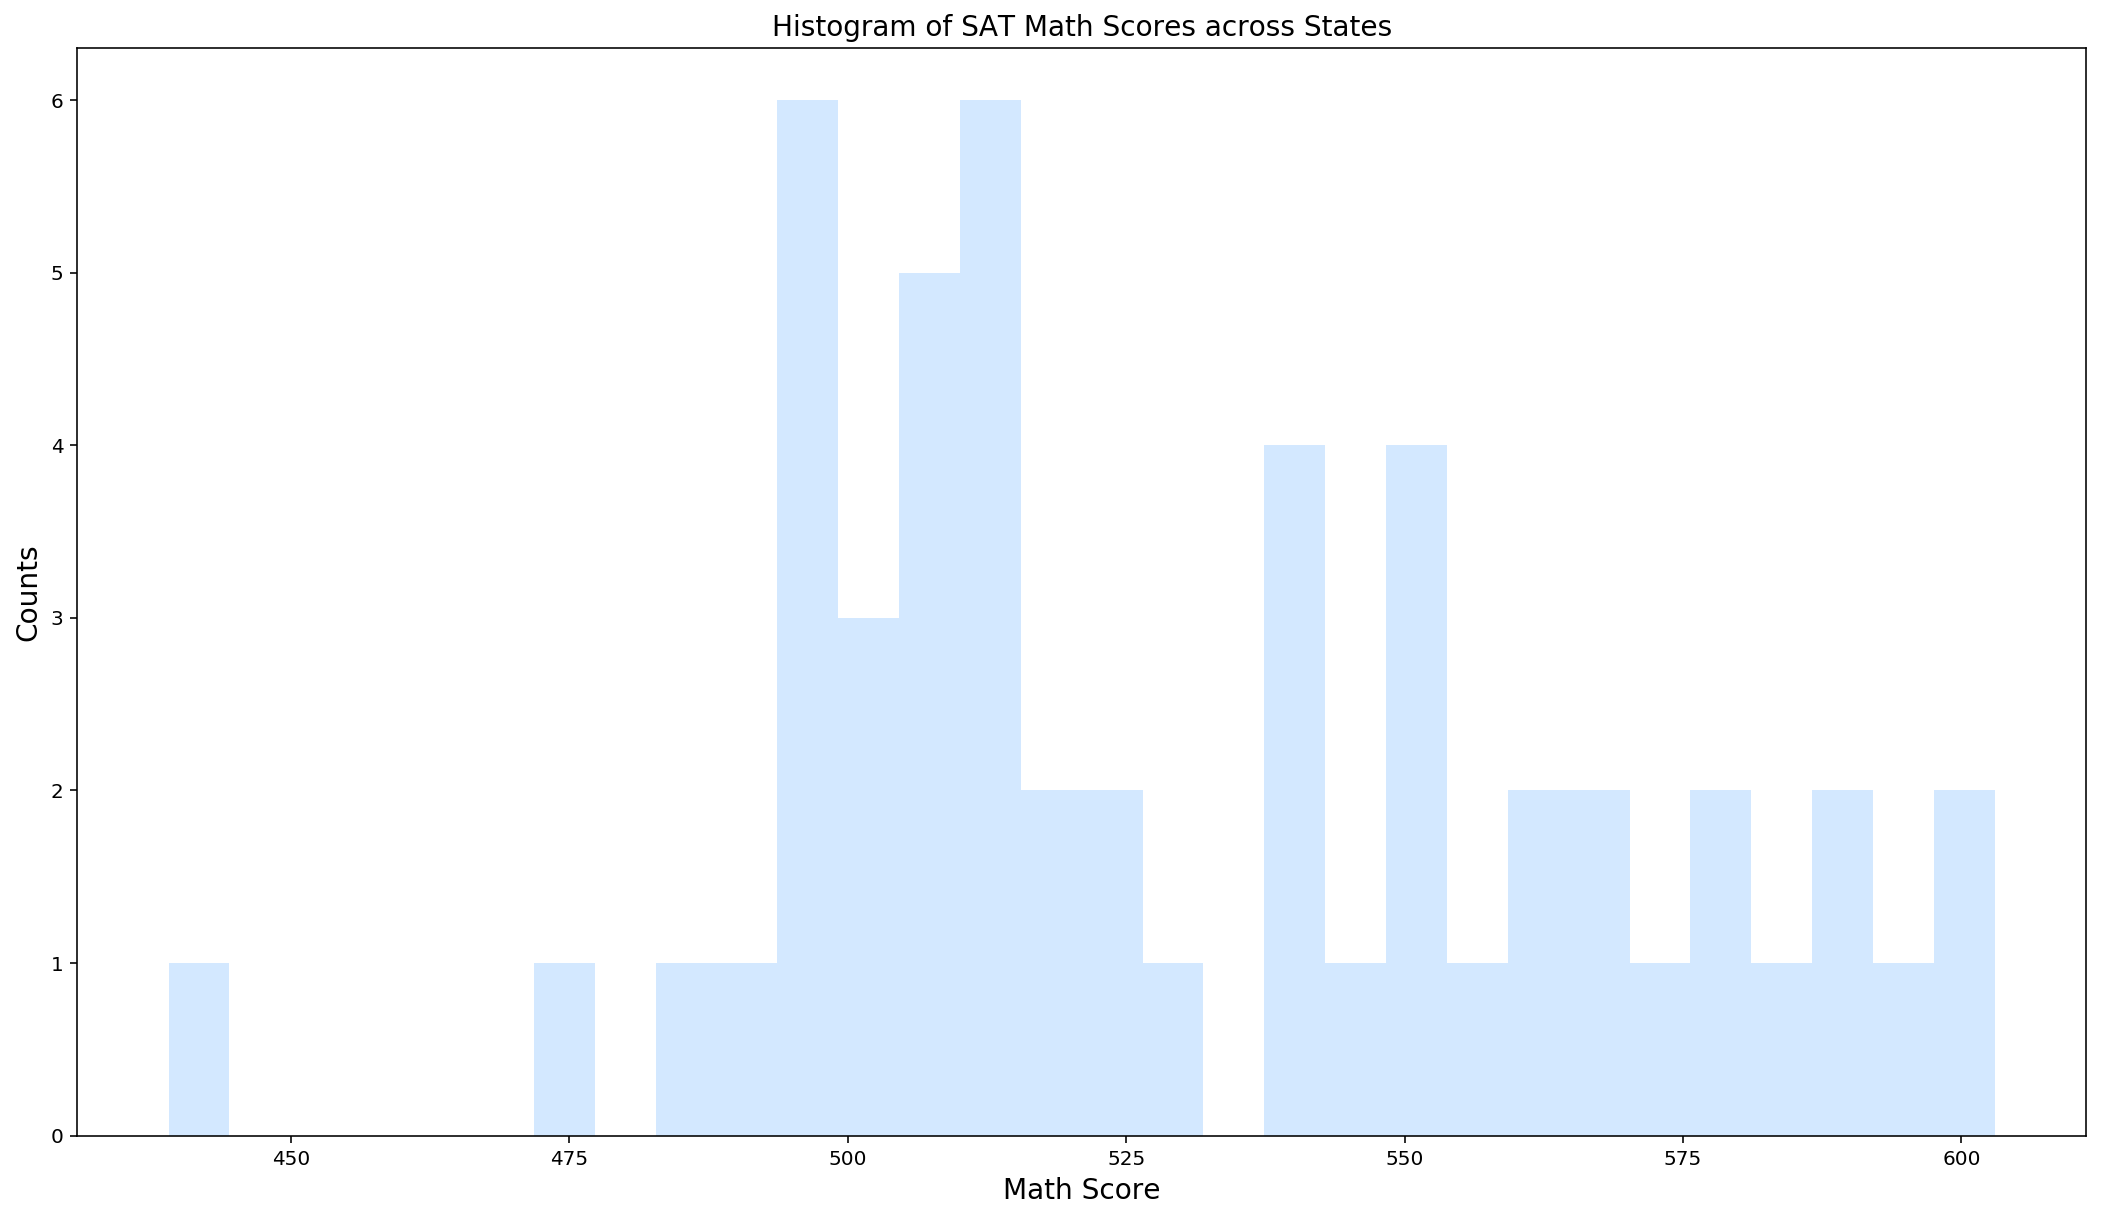

In [9]:
#plot the histogram for SAT Math

#adjust size of the plot
fig = plt.figure(figsize=(18,10))

sns.distplot(sat_scores.Math,bins=30,kde=False)

#define titles and axis labels
plt.title('Histogram of SAT Math Scores across States',fontsize=14)
plt.ylabel('Counts', fontsize=14)
plt.xlabel('Math Score',fontsize=14)

Text(0.5, 0, 'Verbal Score')

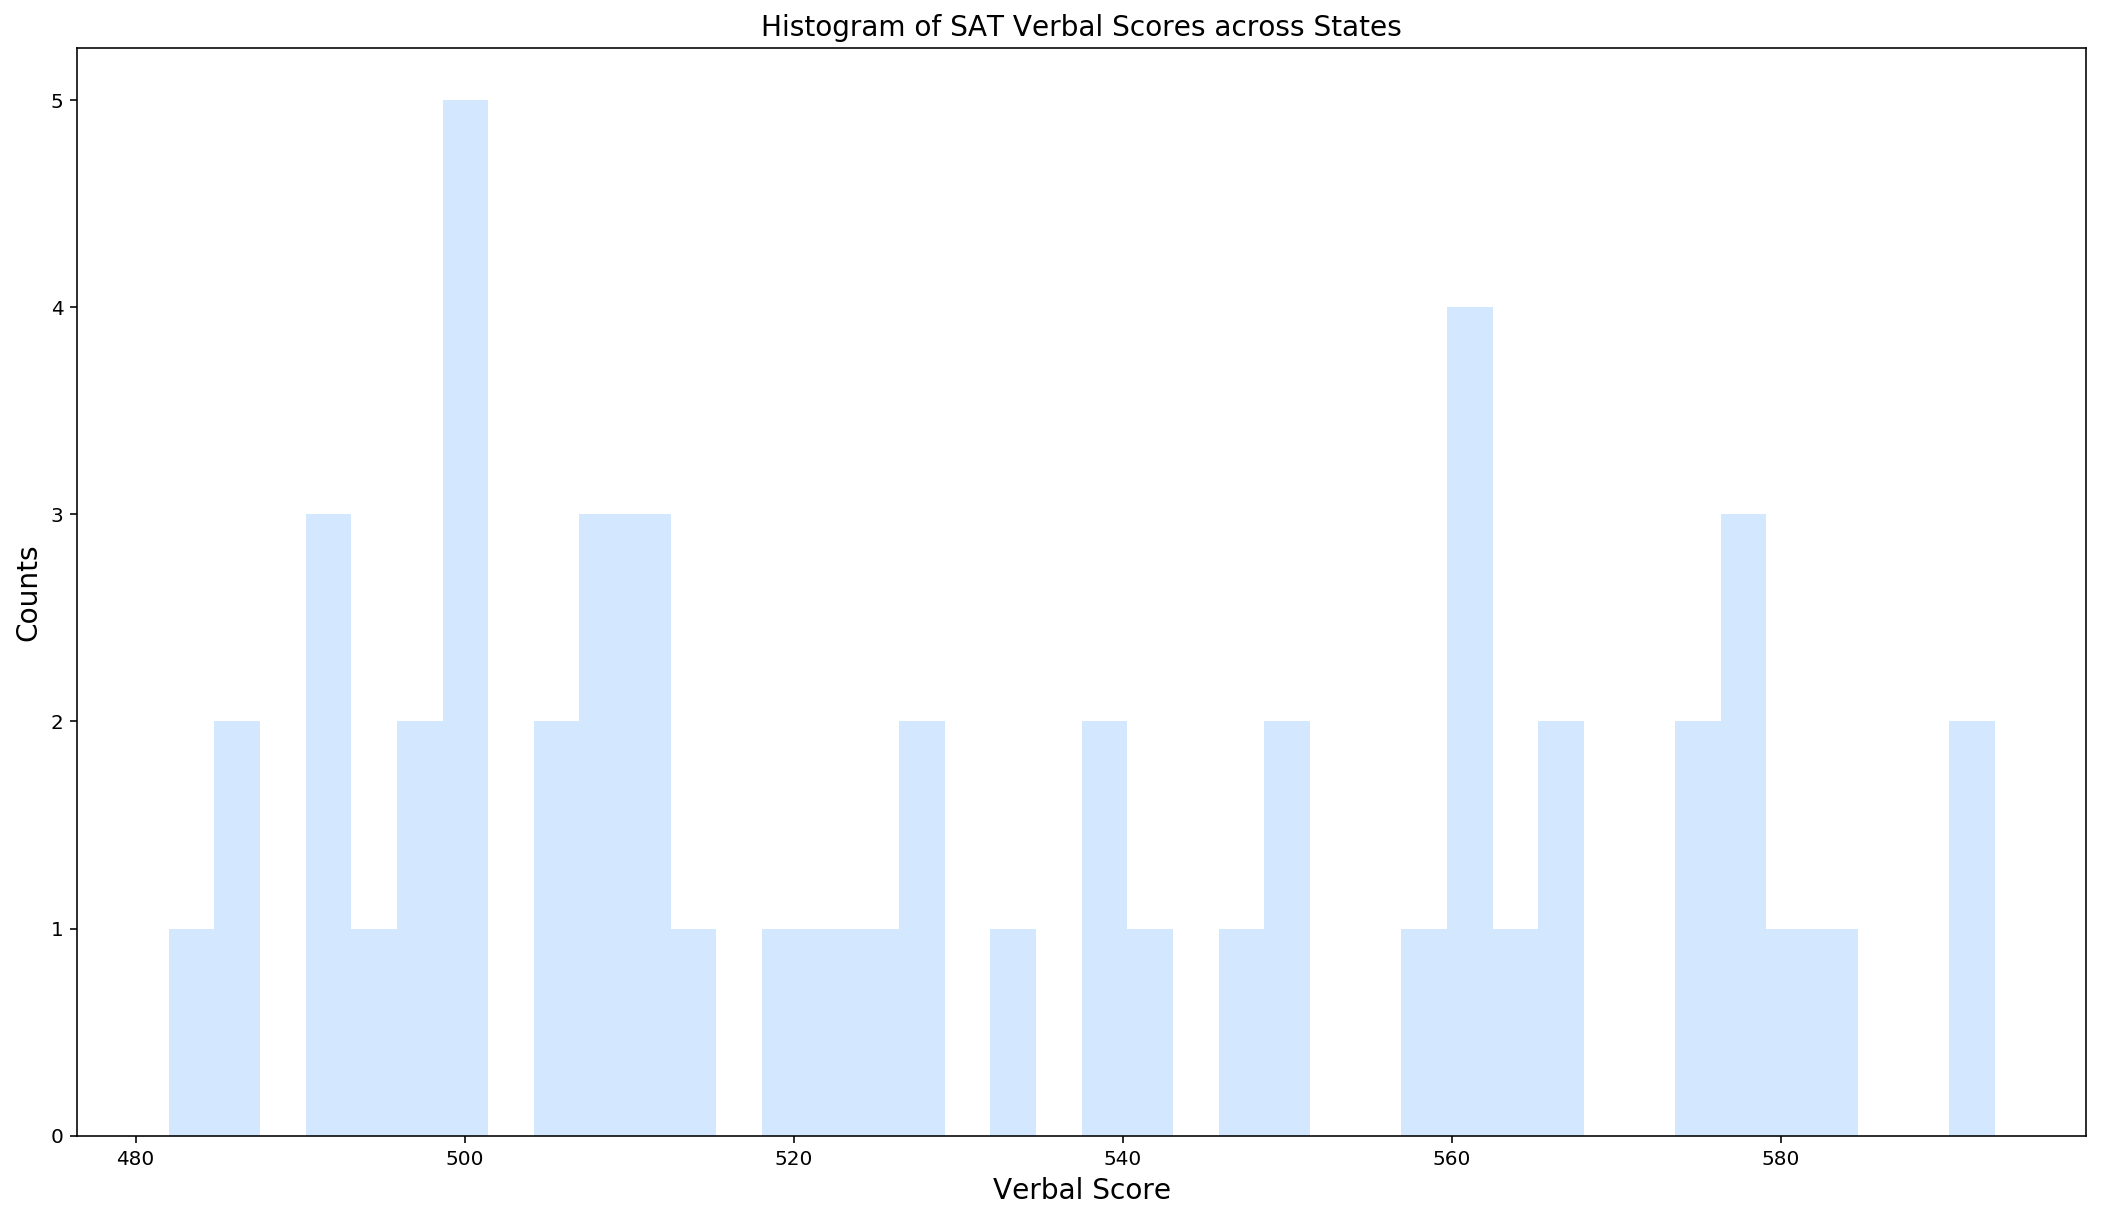

In [10]:
#adjust size of the plot
fig = plt.figure(figsize=(18,10))

#plot the histogram for SAT Verbal
sns.distplot(sat_scores.Verbal,bins=40,kde=False)

#define titles and axis labels
plt.title('Histogram of SAT Verbal Scores across States',fontsize=14)
plt.ylabel('Counts', fontsize=14)
plt.xlabel('Verbal Score',fontsize=14)

### 3.2 Using seaborn's `pairplot`, show the joint distributions for each of `Rate`, `Math`, and `Verbal`

Explain what the visualization tells you about your data.

[Please read over the `pairplot` documentation to fine-tune your chart.](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.pairplot.html#seaborn.pairplot)

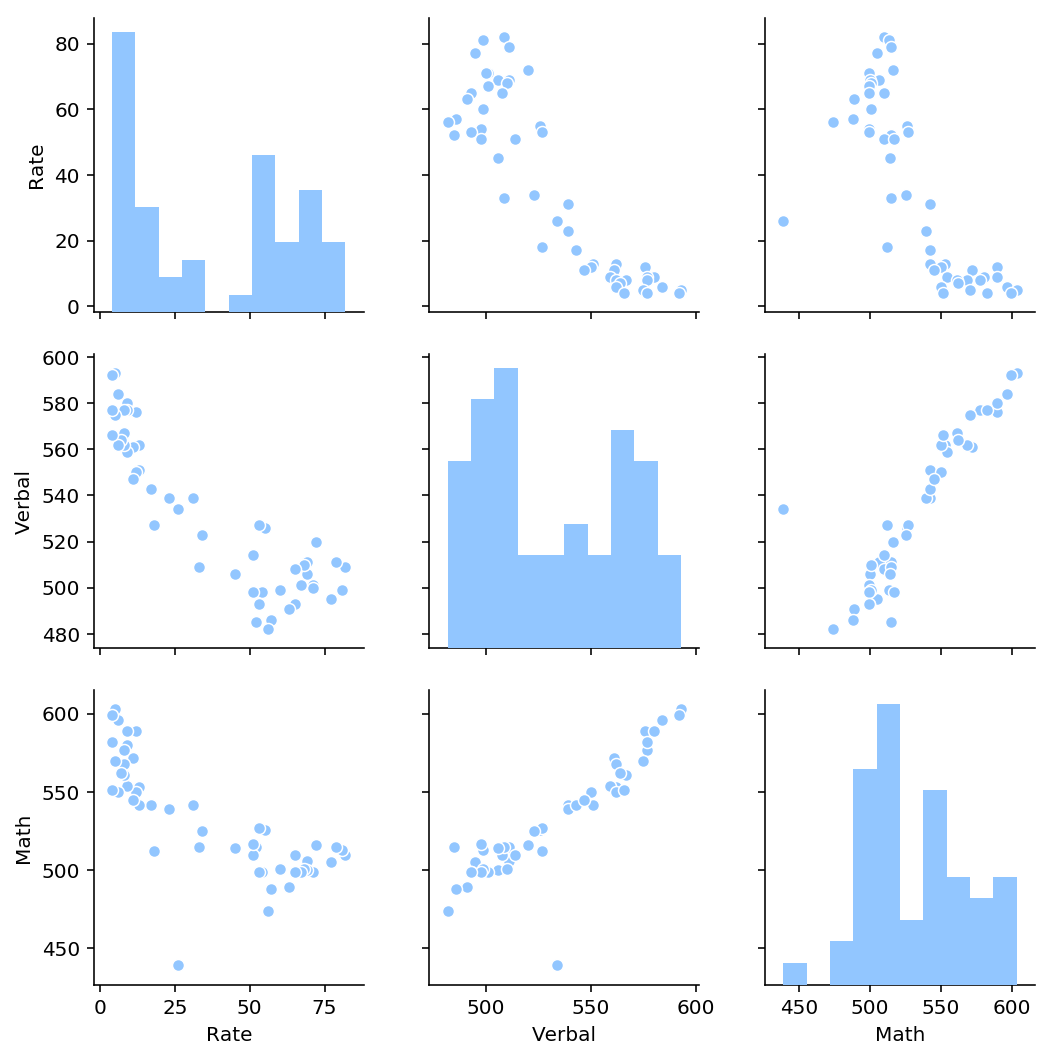

In [11]:
sns.pairplot(sat_scores)

Explain what the visualisation tells you about the data

This visualisation plots pairwise relationships in the dataset.

By default, this function will create a grid of Axes such that each variable in data will by shared in the y-axis across a single row and in the x-axis across a single column. The diagonal Axes are treated differently, drawing a plot to show the univariate distribution of the data for the variable in that column.

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 4. Plot the data using built-in pandas functions.

---

Pandas is very powerful and contains a variety of nice, built-in plotting functions for your data. Read the documentation here to understand the capabilities:

http://pandas.pydata.org/pandas-docs/stable/visualization.html

### 4.1 Plot a stacked histogram with `Verbal` and `Math` using pandas

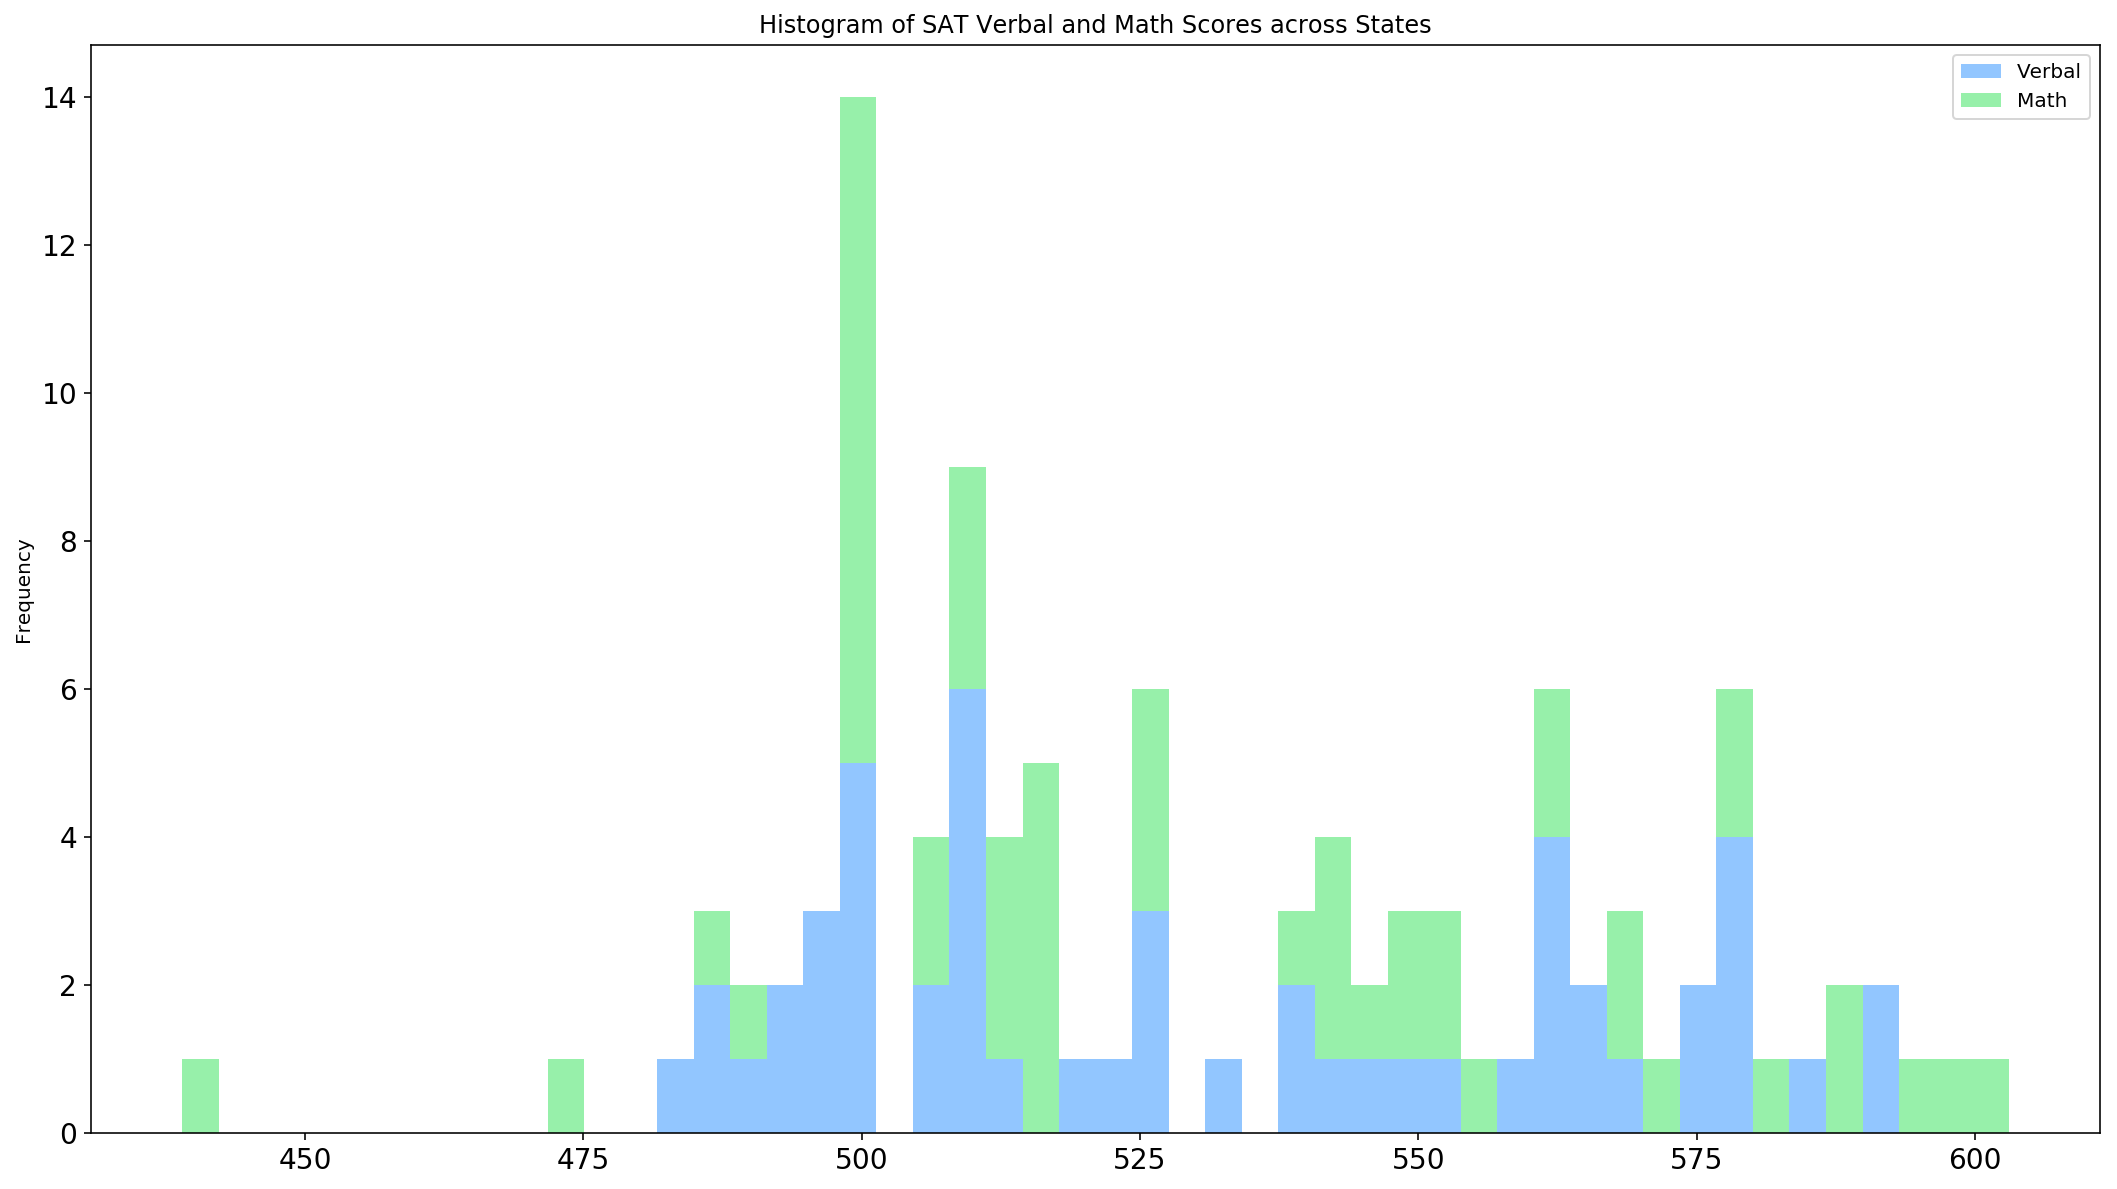

In [12]:

sat_scores[['Verbal','Math']].plot.hist(fontsize = 14,stacked = True,
                                        bins=50, figsize=(18, 10),
                                        title = "Histogram of SAT Verbal and Math Scores across States")


### 4.2 Plot `Verbal` and `Math` on the same chart using boxplots

What are the benefits of using a boxplot as compared to a scatterplot or a histogram?

What's wrong with plotting a box-plot of `Rate` on the same chart as `Math` and `Verbal`?

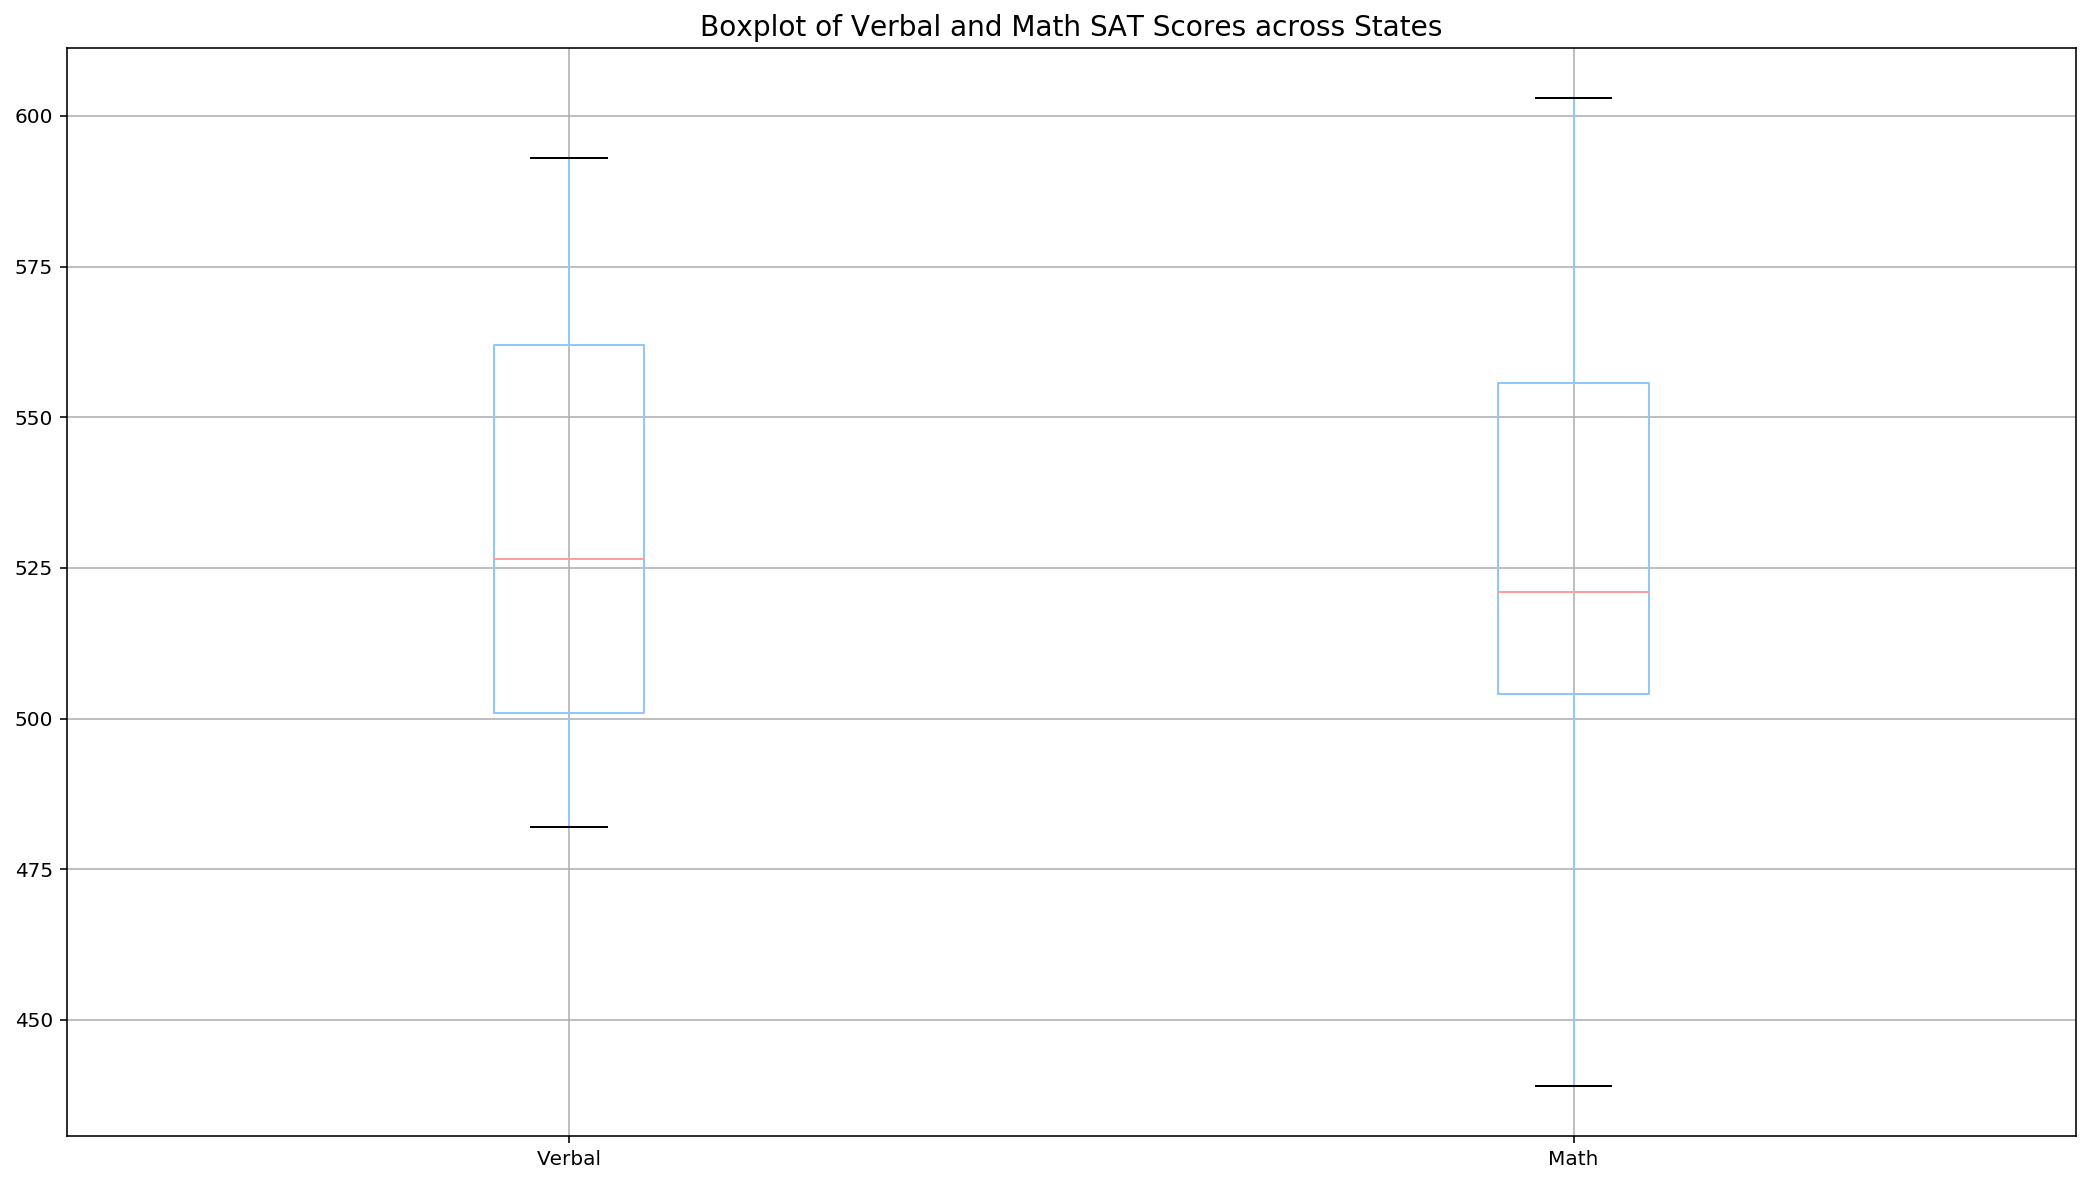

In [13]:
#adjust size of the plot
fig = plt.figure(figsize=(18,10))

#define titles and axis labels
plt.title('Boxplot of Verbal and Math SAT Scores across States',fontsize=14)


sat_scores[['Verbal','Math']].boxplot()


What's wrong with plotting boxplot of Rate on the same chart as Math and Verbal?

The box-plot of rate should not be plotted on the same chart as Math and Verbal as the scale of the indicators differ in magnitude and would be very difficult to compare 

# <img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 4.3 Plot `Verbal`, `Math`, and `Rate` appropriately on the same boxplot chart

Think about how you might change the variables so that they would make sense on the same chart. Explain your rationale for the choices on the chart. You should strive to make the chart as intuitive as possible. 


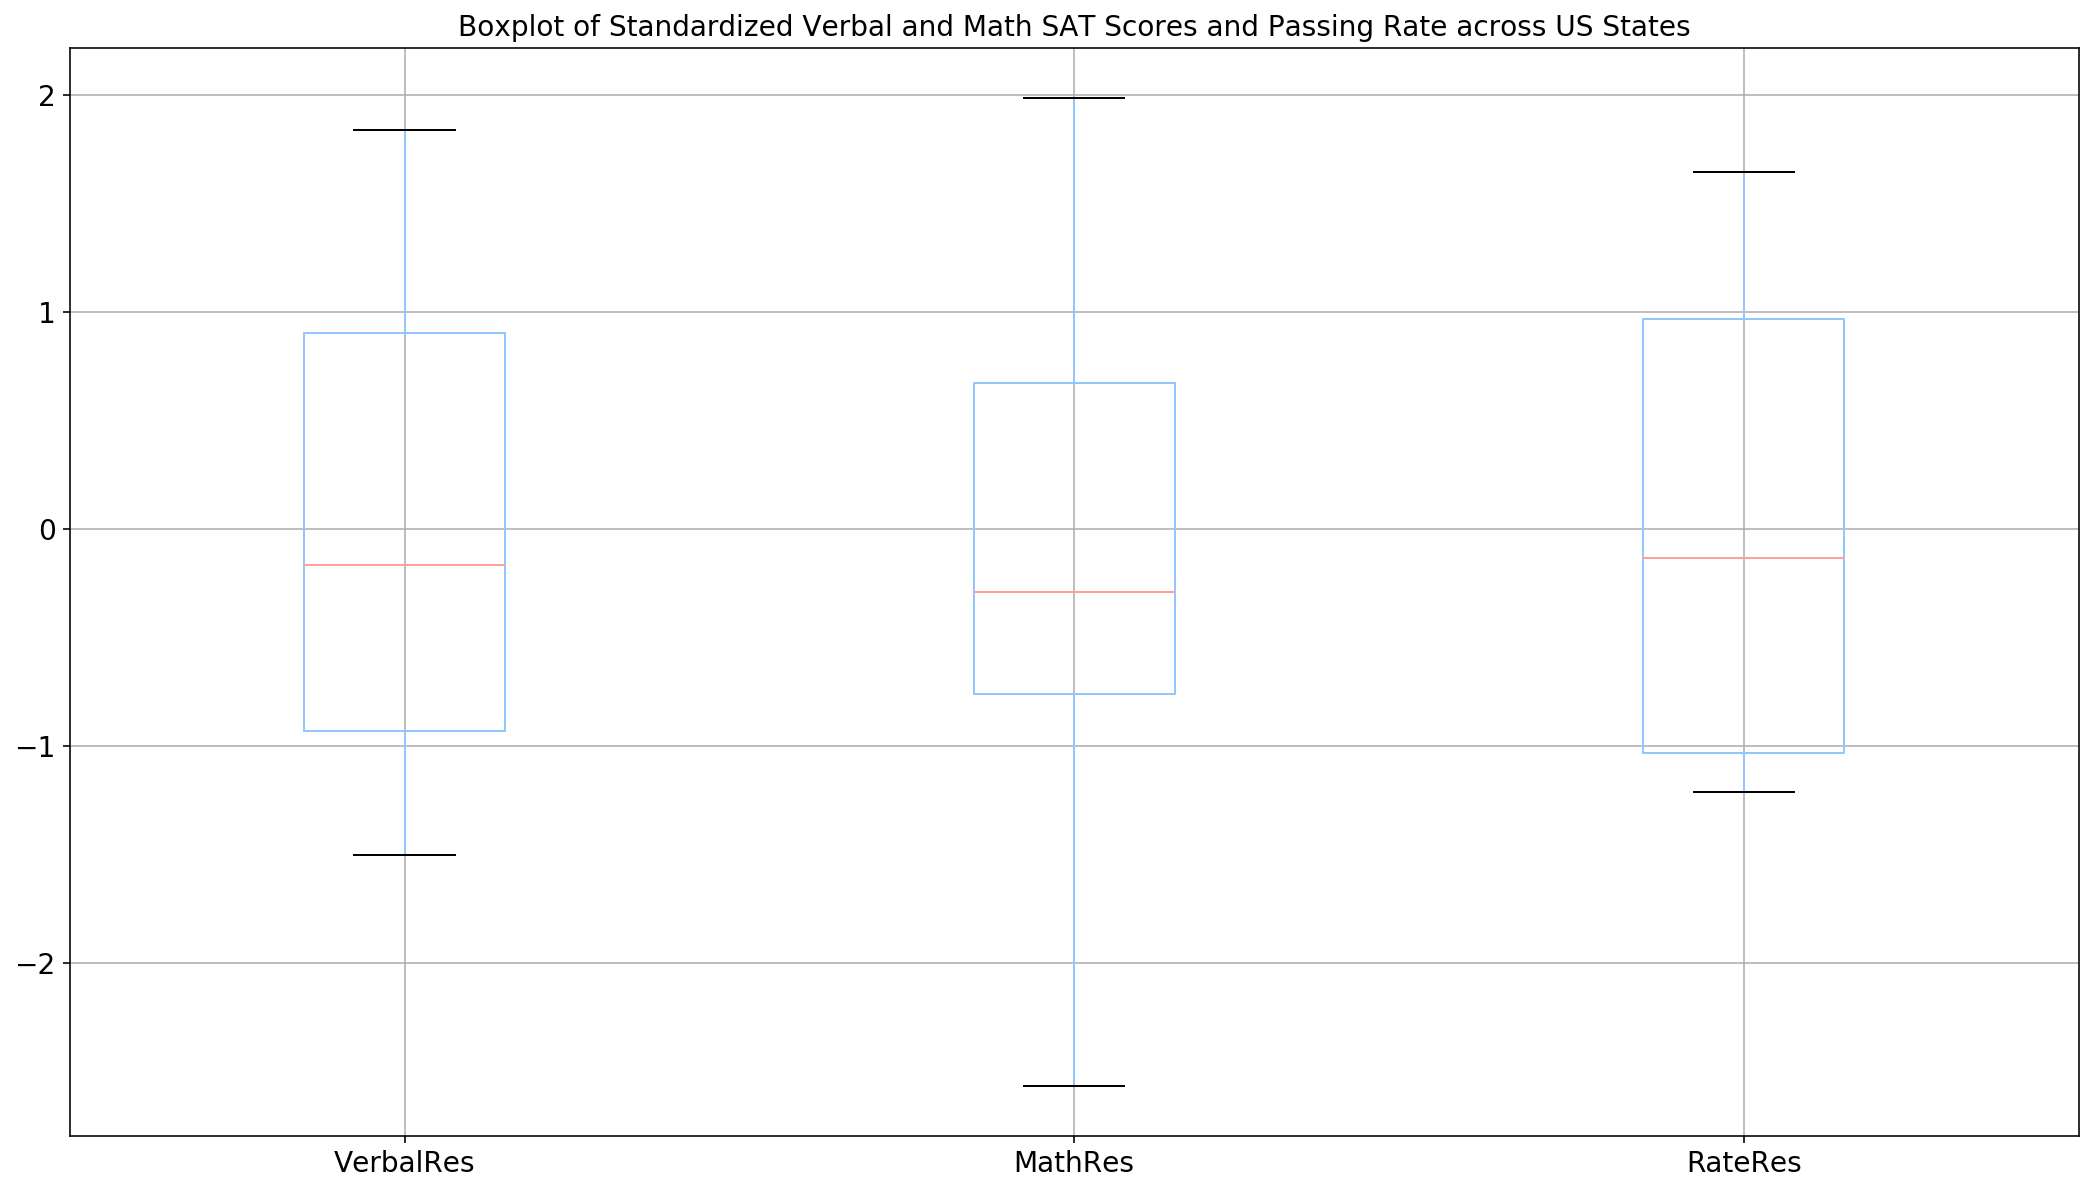

In [14]:
#rescale all SAT statistics by standardizing such that they are all normalised to have a mean of 0 and a standard deviation of 1.

#standardized_variable = (variable - mean_of_variable) / std_dev_of_variable

#find mean and standard deviation for each of the variables
verb_mean = sat_scores['Verbal'].mean()

verb_std = sat_scores['Verbal'].std()

#normalised variable for SAT verbal score
res_verb = (sat_scores['Verbal']-verb_mean)/verb_std

#find mean and standard deviation for each of the variables
math_mean = sat_scores['Math'].mean()

math_std = sat_scores['Math'].std()

#normalised variable for SAT Math score
res_math = (sat_scores['Math']-math_mean)/math_std

#find mean and standard deviation for each of the variables
rate_mean = sat_scores['Rate'].mean()

rate_std = sat_scores['Rate'].std()

#normalised variable for SAT Rate
res_rate = (sat_scores['Rate']-rate_mean)/rate_std

#adjust size of the plot
fig = plt.figure(figsize=(18,10))

#define titles and axis labels
plt.title('Boxplot of Standardized Verbal and Math SAT Scores and Passing Rate across US States',fontsize=14)

sat_scores['VerbalRes'] = res_verb
sat_scores['MathRes'] = res_math
sat_scores['RateRes'] = res_rate


sat_scores[['VerbalRes','MathRes','RateRes']].boxplot(fontsize=14)

sat_scores.drop(['VerbalRes','MathRes','RateRes'],axis=1,inplace=True)


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 5. Create and examine subsets of the data

---

For these questions you will practice **masking** in pandas. Masking uses conditional statements to select portions of your DataFrame (through boolean operations under the hood.)

Remember the distinction between DataFrame indexing functions in pandas:

    .iloc[row, col] : row and column are specified by index, which are integers
    .loc[row, col]  : row and column are specified by string "labels" (boolean arrays are allowed; useful for rows)
    .ix[row, col]   : row and column indexers can be a mix of labels and integer indices
    
For detailed reference and tutorial make sure to read over the pandas documentation:

http://pandas.pydata.org/pandas-docs/stable/indexing.html



### 5.1 Find the list of states that have `Verbal` scores greater than the average of `Verbal` scores across states

How many states are above the mean? What does this tell you about the distribution of `Verbal` scores?




In [15]:
above_vmean = sat_scores[sat_scores['Verbal'] > verb_mean]['State'].count()

print("The number of states with Verbal score above the mean is",above_vmean)

The number of states with Verbal score above the mean is 24


What does this tell you about the distribution of the Verbal scores?

### 5.2 Find the list of states that have `Verbal` scores greater than the median of `Verbal` scores across states

How does this compare to the list of states greater than the mean of `Verbal` scores? Why?

In [16]:
verb_med = np.median(sat_scores['Verbal'])

above_vmed = sat_scores[sat_scores['Verbal'] > verb_med]['State'].count()

print("The number of states with Verbal score above the median is",above_vmed)


The number of states with Verbal score above the median is 26


There are more states with score above median than with score above mean as the median is less than the mean.

### 5.3 Create a column that is the difference between the `Verbal` and `Math` scores

Specifically, this should be `Verbal - Math`.

In [17]:

#create a new column labelled 'Verbal - Math'
sat_scores['Verbal - Math'] = sat_scores['Verbal']-sat_scores['Math']

sat_scores.head()

,State,Rate,Verbal,Math,Verbal - Math
0,CT,82,509,510,-1
1,NJ,81,499,513,-14
2,MA,79,511,515,-4
3,NY,77,495,505,-10
4,NH,72,520,516,4


### 5.4 Create two new DataFrames showing states with the greatest difference between scores

1. Your first DataFrame should be the 10 states with the greatest gap between `Verbal` and `Math` scores where `Verbal` is greater than `Math`. It should be sorted appropriately to show the ranking of states.
2. Your second DataFrame will be the inverse: states with the greatest gap between `Verbal` and `Math` such that `Math` is greater than `Verbal`. Again, this should be sorted appropriately to show rank.
3. Print the header of both variables, only showing the top 3 states in each.

In [18]:

#show top 10 states with the greatest gap between Verbal and Math scores, where Verbal score is greater than Math
top10_VM = sat_scores.sort_values('Verbal - Math',ascending=False).head(10)

In [19]:
#show top 10 states with the greatest gap between Verbal and Math scores, where Math score is greater than Verbal
top10_MV = sat_scores.sort_values('Verbal - Math',ascending=True).head(10)

In [20]:
top10_VM.head(3)

,State,Rate,Verbal,Math,Verbal - Math
27,OH,26,534,439,95
50,MS,4,566,551,15
29,WV,18,527,512,15


In [21]:
top10_MV.head(3)

,State,Rate,Verbal,Math,Verbal - Math
21,HI,52,485,515,-30
23,CA,51,498,517,-19
1,NJ,81,499,513,-14


## 6. Examine summary statistics

---

Checking the summary statistics for data is an essential step in the EDA process!

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.1 Create the correlation matrix of your variables (excluding `State`).

What does the correlation matrix tell you?


In [22]:
sat_scores[['Rate','Verbal','Math','Verbal - Math']].corr()

,Rate,Verbal,Math,Verbal - Math
Rate,1.000000,-0.886432,-0.773746,-0.101412
Verbal,-0.886432,1.000000,0.899871,0.052600
Math,-0.773746,0.899871,1.000000,-0.388219
Verbal - Math,-0.101412,0.052600,-0.388219,1.000000


This correlation matrix tells us the that there is a strong linear correlation between Math and Verbal scores as the correlation coefficient is close to 1 (0.899871)


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.2 Use pandas'  `.describe()` built-in function on your DataFrame

Write up what each of the rows returned by the function indicate.

In [23]:
sat_scores.describe()

,Rate,Verbal,Math,Verbal - Math
count,52.000000,52.000000,52.000000,52.000000
mean,37.153846,532.019231,531.500000,0.519231
std,27.301788,33.236225,36.014975,15.729939
min,4.000000,482.000000,439.000000,-30.000000
25%,9.000000,501.000000,504.000000,-6.000000
50%,33.500000,526.500000,521.000000,0.000000
75%,63.500000,562.000000,555.750000,4.250000
max,82.000000,593.000000,603.000000,95.000000


Write up what each of the rows returned by the function indicate:

The count indicates the total number of rows.

Mean indicates the mean rate, verbal etc scores across all 52 states

Std indicates the standard deviation of the rate, verbal, math and verbal - math scores.

Min indicates the minimum value in that column

25% indicates the 1st quartile
50% indicates the median
75% indicates the 3rd quartile

Max indicates the maximum value in that column

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.3 Assign and print the _covariance_ matrix for the dataset

1. Describe how the covariance matrix is different from the correlation matrix.
2. What is the process to convert the covariance into the correlation?
3. Why is the correlation matrix preferred to the covariance matrix for examining relationships in your data?

In [24]:
sat_scores.cov()

,Rate,Verbal,Math,Verbal - Math
Rate,745.387632,-804.355958,-760.803922,-43.552036
Verbal,-804.355958,1104.646682,1077.147059,27.499623
Math,-760.803922,1077.147059,1297.078431,-219.931373
Verbal - Math,-43.552036,27.499623,-219.931373,247.430995


Describe how the covariance matrix is different from the correlation matrix

The covariance is a measure of "relatedness" between variables. It's the sum of deviations from the mean of X, multiplied by deviations from the mean of Y, adjusted by the sample size N.

Covariance is not easy to interpret. The values are difficult to read because they are relative to the variance of the variables.

Correlation matrix is basically derived from Covariance matrix, divided by the Standard Deviation of X and Standard Deviation of Y.

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 7. Performing EDA on "drug use by age" data.

---

You will now switch datasets to one with many more variables. This section of the project is more open-ended - use the techniques you practiced above!

We'll work with the "drug-use-by-age.csv" data, sourced from and described here: https://github.com/fivethirtyeight/data/tree/master/drug-use-by-age.

### 7.1

Load the data using pandas. Does this data require cleaning? Are variables missing? How will this affect your approach to EDA on the data?

In [25]:
# load in data
# hygiene checks: Null/weird values, are data types for each column correct? (.describe, .info)
# understand what data you are looking at - what do the columns/rows/numbers mean
# any possible problems in the dataset (e.g. aggregated age bands)
# identify and fix or find workarounds so that your data is ready for the next step

In [26]:
drugfile = "./drug-use-by-age.csv"

#load the data with read_csv function
drugs = pd.read_csv(drugfile, encoding='latin-1')

drugs


,age,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,cocaine-frequency,crack-use,crack-frequency,...,oxycontin-use,oxycontin-frequency,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,meth-frequency,sedative-use,sedative-frequency
0,12,2798,3.9,3.0,1.1,4.0,0.1,5.0,0.0,-,...,0.1,24.5,0.2,52.0,0.2,2.0,0.0,-,0.2,13.0
1,13,2757,8.5,6.0,3.4,15.0,0.1,1.0,0.0,3.0,...,0.1,41.0,0.3,25.5,0.3,4.0,0.1,5.0,0.1,19.0
2,14,2792,18.1,5.0,8.7,24.0,0.1,5.5,0.0,-,...,0.4,4.5,0.9,5.0,0.8,12.0,0.1,24.0,0.2,16.5
3,15,2956,29.2,6.0,14.5,25.0,0.5,4.0,0.1,9.5,...,0.8,3.0,2.0,4.5,1.5,6.0,0.3,10.5,0.4,30.0
4,16,3058,40.1,10.0,22.5,30.0,1.0,7.0,0.0,1.0,...,1.1,4.0,2.4,11.0,1.8,9.5,0.3,36.0,0.2,3.0
5,17,3038,49.3,13.0,28.0,36.0,2.0,5.0,0.1,21.0,...,1.4,6.0,3.5,7.0,2.8,9.0,0.6,48.0,0.5,6.5
6,18,2469,58.7,24.0,33.7,52.0,3.2,5.0,0.4,10.0,...,1.7,7.0,4.9,12.0,3.0,8.0,0.5,12.0,0.4,10.0
7,19,2223,64.6,36.0,33.4,60.0,4.1,5.5,0.5,2.0,...,1.5,7.5,4.2,4.5,3.3,6.0,0.4,105.0,0.3,6.0
8,20,2271,69.7,48.0,34.0,60.0,4.9,8.0,0.6,5.0,...,1.7,12.0,5.4,10.0,4.0,12.0,0.9,12.0,0.5,4.0
9,21,2354,83.2,52.0,33.0,52.0,4.8,5.0,0.5,17.0,...,1.3,13.5,3.9,7.0,4.1,10.0,0.6,2.0,0.3,9.0


In [27]:
#find size of data
drugs.shape

(17, 28)

In [28]:
#find data types of the columns in the data

drugs.dtypes

#some columns are objects instead of float or int, so we can look further into those columns to check for unexpected values

age                         object
n                            int64
alcohol-use                float64
alcohol-frequency          float64
marijuana-use              float64
marijuana-frequency        float64
cocaine-use                float64
cocaine-frequency           object
crack-use                  float64
crack-frequency             object
heroin-use                 float64
heroin-frequency            object
hallucinogen-use           float64
hallucinogen-frequency     float64
inhalant-use               float64
inhalant-frequency          object
pain-releiver-use          float64
pain-releiver-frequency    float64
oxycontin-use              float64
oxycontin-frequency         object
tranquilizer-use           float64
tranquilizer-frequency     float64
stimulant-use              float64
stimulant-frequency        float64
meth-use                   float64
meth-frequency              object
sedative-use               float64
sedative-frequency         float64
dtype: object

In [29]:
#check if there are any null values

drugs.isnull().sum()


age                        0
n                          0
alcohol-use                0
alcohol-frequency          0
marijuana-use              0
marijuana-frequency        0
cocaine-use                0
cocaine-frequency          0
crack-use                  0
crack-frequency            0
heroin-use                 0
heroin-frequency           0
hallucinogen-use           0
hallucinogen-frequency     0
inhalant-use               0
inhalant-frequency         0
pain-releiver-use          0
pain-releiver-frequency    0
oxycontin-use              0
oxycontin-frequency        0
tranquilizer-use           0
tranquilizer-frequency     0
stimulant-use              0
stimulant-frequency        0
meth-use                   0
meth-frequency             0
sedative-use               0
sedative-frequency         0
dtype: int64

In [30]:
#there are no null values, but some fields have been filled with '-'

#replace '-'' with 0

drugs.replace('-',0,inplace=True)
drugs.head()

#convert objects to float

drugs['cocaine-frequency'] = drugs['cocaine-frequency'].astype(float)
drugs['crack-frequency'] = drugs['crack-frequency'].astype(float)
drugs['heroin-frequency'] = drugs['heroin-frequency'].astype(float)
drugs['inhalant-frequency'] = drugs['inhalant-frequency'].astype(float)
drugs['oxycontin-frequency'] = drugs['oxycontin-frequency'].astype(float)
drugs['meth-frequency'] = drugs['meth-frequency'].astype(float)

In [31]:
#see summary statistics for for dataset

drugs.describe()

,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,cocaine-frequency,crack-use,crack-frequency,heroin-use,...,oxycontin-use,oxycontin-frequency,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,meth-frequency,sedative-use,sedative-frequency
count,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,...,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000
mean,3251.058824,55.429412,33.352941,18.923529,42.941176,2.176471,7.411765,0.294118,12.382353,0.352941,...,0.935294,13.941176,2.805882,11.735294,1.917647,31.147059,0.382353,31.735294,0.282353,19.382353
std,1297.890426,26.878866,21.318833,11.959752,18.362566,1.816772,8.014119,0.235772,17.361532,0.333762,...,0.608216,12.902134,1.753379,11.485205,1.407673,85.973790,0.262762,32.206423,0.138000,24.833527
min,2223.000000,3.900000,3.000000,1.100000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.200000,4.500000,0.000000,2.000000,0.000000,0.000000,0.000000,3.000000
25%,2469.000000,40.100000,10.000000,8.700000,30.000000,0.500000,5.000000,0.000000,2.000000,0.100000,...,0.400000,5.000000,1.400000,6.000000,0.600000,7.000000,0.200000,10.500000,0.200000,6.500000
50%,2798.000000,64.600000,48.000000,20.800000,52.000000,2.000000,5.000000,0.400000,6.000000,0.200000,...,1.100000,12.000000,3.500000,10.000000,1.800000,10.000000,0.400000,24.000000,0.300000,10.000000
75%,3058.000000,77.500000,52.000000,28.400000,52.000000,4.000000,7.000000,0.500000,15.000000,0.600000,...,1.400000,17.500000,4.200000,11.000000,3.000000,12.000000,0.600000,46.000000,0.400000,17.500000
max,7391.000000,84.200000,52.000000,34.000000,72.000000,4.900000,36.000000,0.600000,62.000000,1.100000,...,1.700000,46.000000,5.400000,52.000000,4.100000,364.000000,0.900000,105.000000,0.500000,104.000000


In [32]:
#check that all data types are as expected now

drugs.dtypes

age                         object
n                            int64
alcohol-use                float64
alcohol-frequency          float64
marijuana-use              float64
marijuana-frequency        float64
cocaine-use                float64
cocaine-frequency          float64
crack-use                  float64
crack-frequency            float64
heroin-use                 float64
heroin-frequency           float64
hallucinogen-use           float64
hallucinogen-frequency     float64
inhalant-use               float64
inhalant-frequency         float64
pain-releiver-use          float64
pain-releiver-frequency    float64
oxycontin-use              float64
oxycontin-frequency        float64
tranquilizer-use           float64
tranquilizer-frequency     float64
stimulant-use              float64
stimulant-frequency        float64
meth-use                   float64
meth-frequency             float64
sedative-use               float64
sedative-frequency         float64
dtype: object

In [33]:
#rename column headers with spelling errors

drugs.rename({'pain-releiver-use':'pain-reliever-use','pain-releiver-frequency':'pain-reliever-frequency'},inplace=True,axis='columns')

### 7.2 Do a high-level, initial overview of the data

Get a feel for what this dataset is all about.

Use whichever techniques you'd like, including those from the SAT dataset EDA. The final response to this question should be a written description of what you infer about the dataset.

Some things to consider doing:

- Look for relationships between variables and subsets of those variables' values
- Derive new features from the ones available to help your analysis
- Visualize everything!

In [34]:
#univariate analysis - distribution
#bivariate analysis - correlation/association
#create any new features that might be useful, state assumptions

#apply transformation like long/wide format if necessary


In [35]:
#create subset of data of just the drug-use numbers (percentage of people in the age group who have consumed that drug in the past 12 months)

drugs_use = drugs[['age','alcohol-use',
                   'marijuana-use','cocaine-use',
                   'crack-use','heroin-use',
                   'hallucinogen-use','inhalant-use',
                  'pain-reliever-use','oxycontin-use',
                  'tranquilizer-use','stimulant-use',
                  'meth-use','sedative-use']]

drugs_use.head()

,age,alcohol-use,marijuana-use,cocaine-use,crack-use,heroin-use,hallucinogen-use,inhalant-use,pain-reliever-use,oxycontin-use,tranquilizer-use,stimulant-use,meth-use,sedative-use
0,12,3.9,1.1,0.1,0.0,0.1,0.2,1.6,2.0,0.1,0.2,0.2,0.0,0.2
1,13,8.5,3.4,0.1,0.0,0.0,0.6,2.5,2.4,0.1,0.3,0.3,0.1,0.1
2,14,18.1,8.7,0.1,0.0,0.1,1.6,2.6,3.9,0.4,0.9,0.8,0.1,0.2
3,15,29.2,14.5,0.5,0.1,0.2,2.1,2.5,5.5,0.8,2.0,1.5,0.3,0.4
4,16,40.1,22.5,1.0,0.0,0.1,3.4,3.0,6.2,1.1,2.4,1.8,0.3,0.2


Text(0.5, 0, 'Drug')

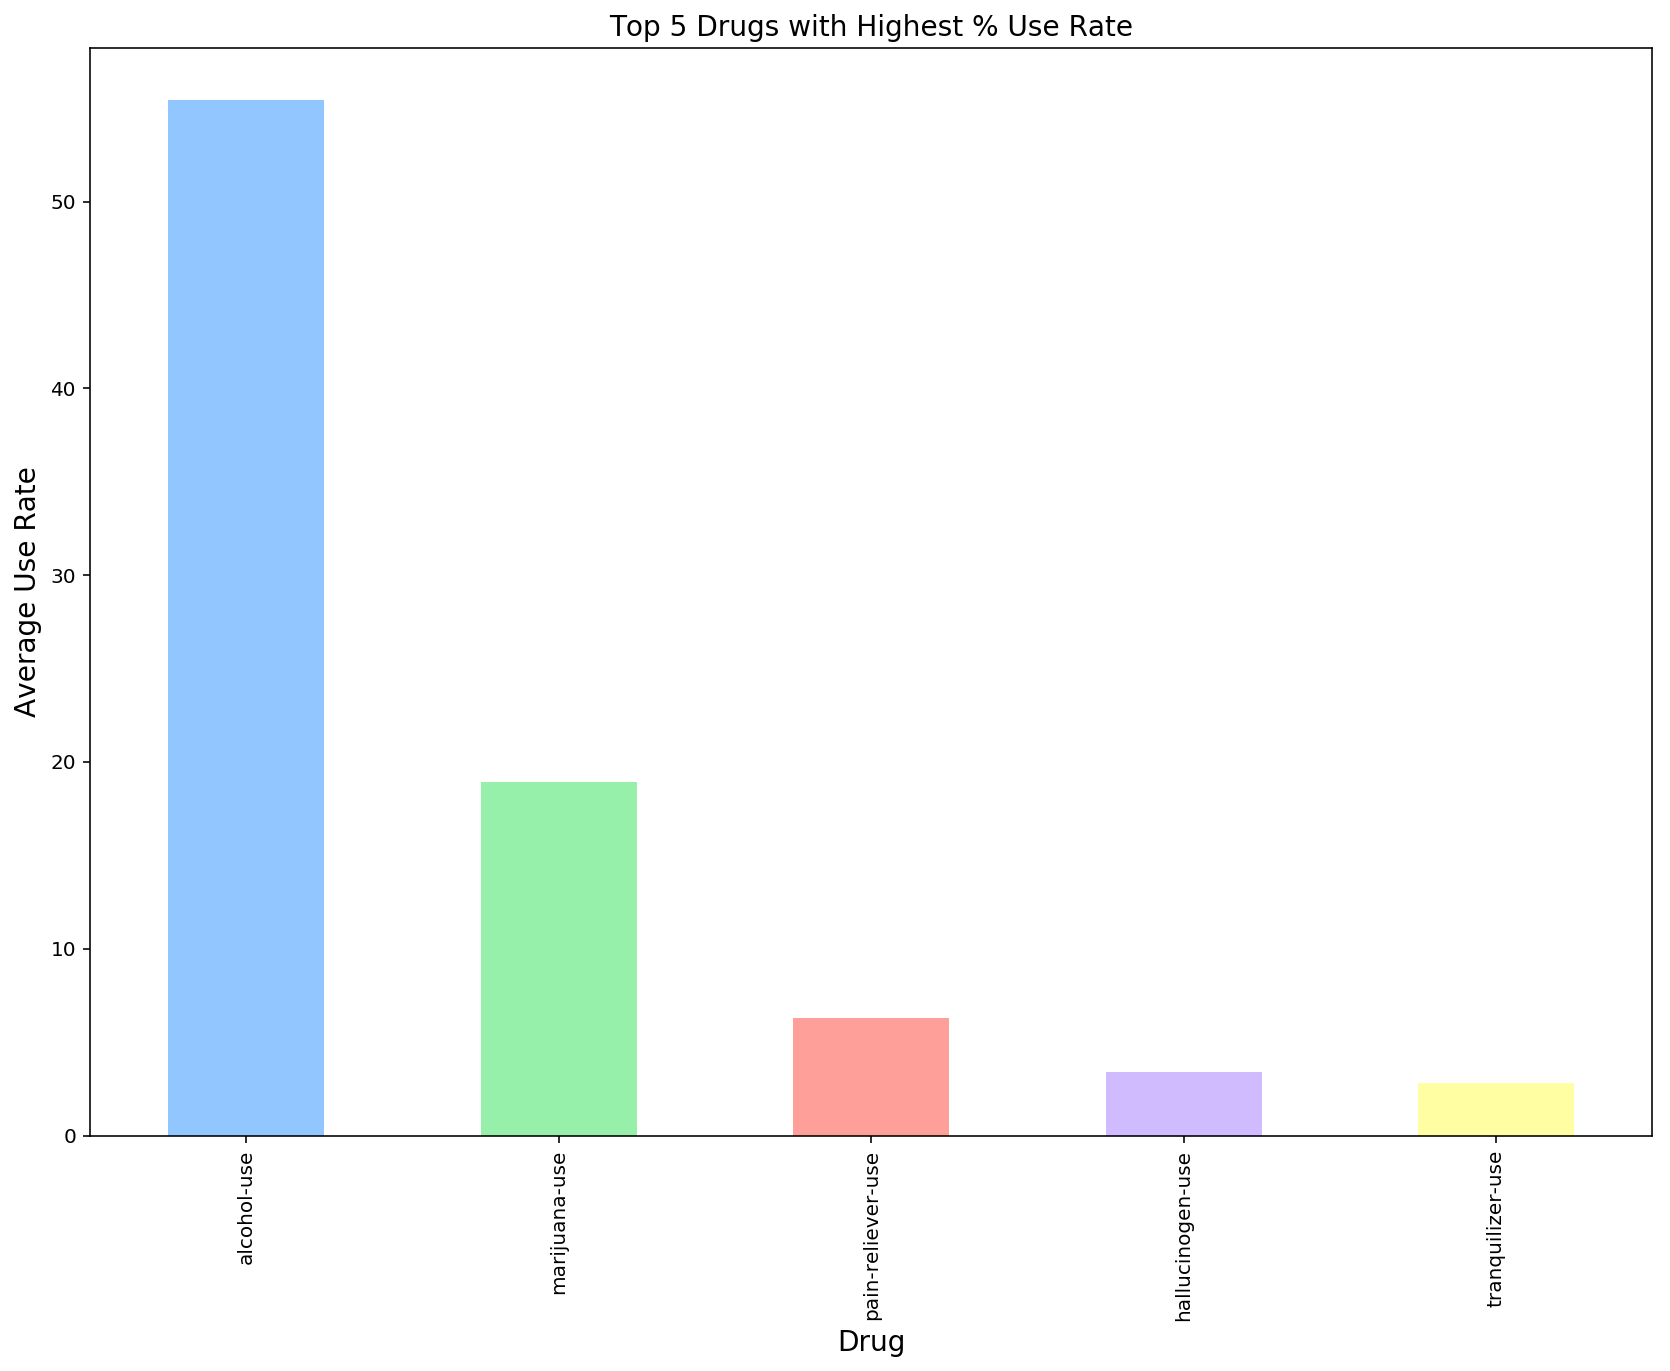

In [36]:
#which drug has the highest use rate across age groups? Plotted top 5 drugs

drugs_use.mean().sort_values(axis=0,ascending=False).head(5).plot(kind='bar', figsize = (14,10))

#define titles and axis labels
plt.title('Top 5 Drugs with Highest % Use Rate',fontsize=14)
plt.ylabel('Average Use Rate', fontsize=14)
plt.xlabel('Drug',fontsize=14)

In [37]:
#create subset of data of just the drug-freq numbers (median no of times a user in the age group has used the drug in the past 12 months)

drugs_freq = drugs[['age','alcohol-frequency',
                   'marijuana-frequency','cocaine-frequency',
                   'crack-frequency','heroin-frequency',
                   'hallucinogen-frequency','inhalant-frequency',
                  'pain-reliever-frequency','oxycontin-frequency',
                  'tranquilizer-frequency','stimulant-frequency',
                  'meth-frequency','sedative-frequency']]

drugs_freq.head()

,age,alcohol-frequency,marijuana-frequency,cocaine-frequency,crack-frequency,heroin-frequency,hallucinogen-frequency,inhalant-frequency,pain-reliever-frequency,oxycontin-frequency,tranquilizer-frequency,stimulant-frequency,meth-frequency,sedative-frequency
0,12,3.0,4.0,5.0,0.0,35.5,52.0,19.0,36.0,24.5,52.0,2.0,0.0,13.0
1,13,6.0,15.0,1.0,3.0,0.0,6.0,12.0,14.0,41.0,25.5,4.0,5.0,19.0
2,14,5.0,24.0,5.5,0.0,2.0,3.0,5.0,12.0,4.5,5.0,12.0,24.0,16.5
3,15,6.0,25.0,4.0,9.5,1.0,4.0,5.5,10.0,3.0,4.5,6.0,10.5,30.0
4,16,10.0,30.0,7.0,1.0,66.5,3.0,3.0,7.0,4.0,11.0,9.5,36.0,3.0


Text(0.5, 0, 'Drug')

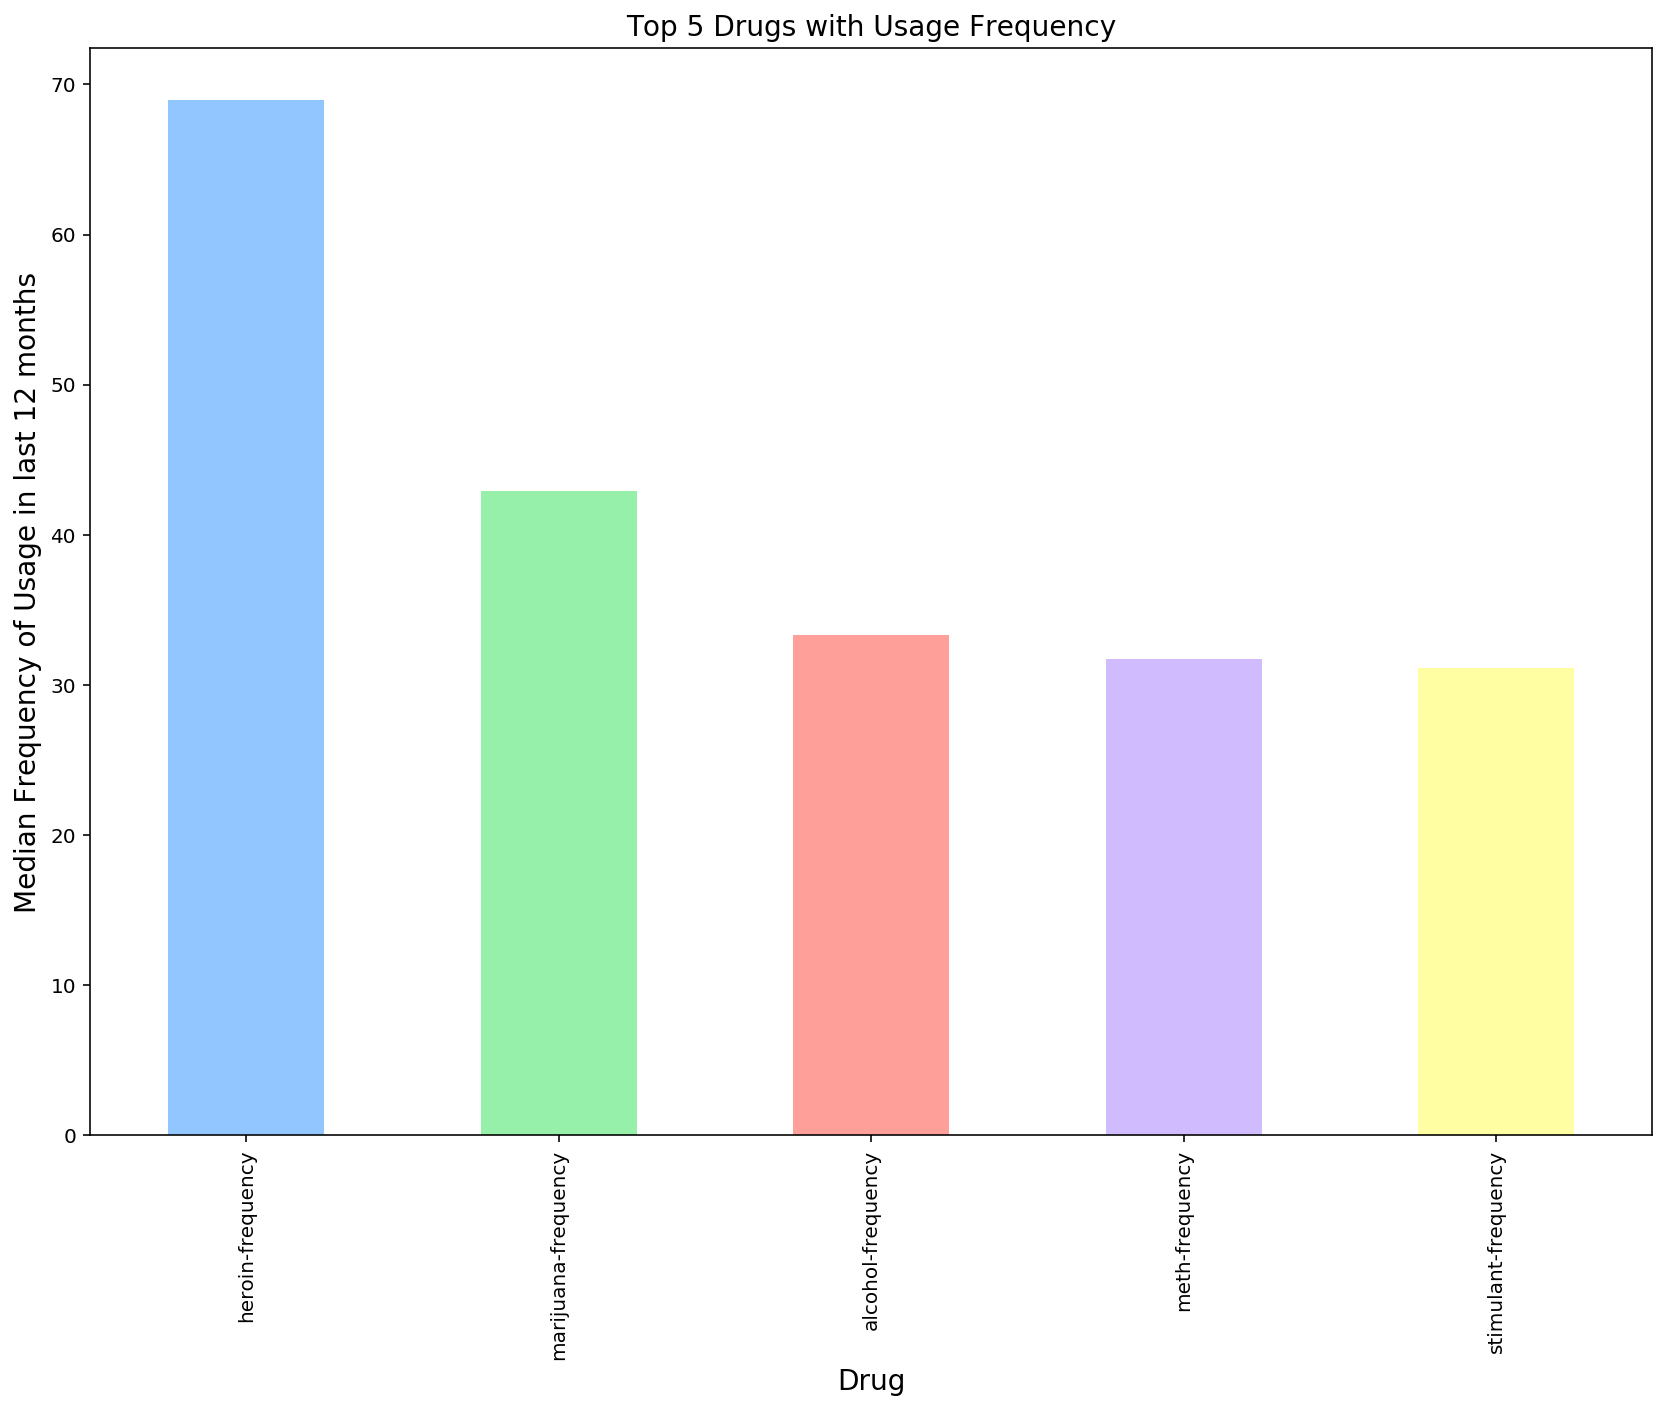

In [38]:
#which drug has the highest usage frequency across age groups? Plotted top 5 drugs

drugs_freq.mean().sort_values(axis=0,ascending=False).head(5).plot(kind='bar', figsize = (14,10))

#define titles and axis labels
plt.title('Top 5 Drugs with Usage Frequency',fontsize=14)
plt.ylabel('Median Frequency of Usage in last 12 months', fontsize=14)
plt.xlabel('Drug',fontsize=14)


The top 5 drugs with highest percentage of users in each age group are : Alcohol, Marijuana, Pain Reliever, Hallucinogen and Tranquilizer

The top 5 drugs with highest median frequency of usage in each age group are : Heroin, Marijuana, Alcohol, Meth and Stimulant.

We will examine these 10 drugs in further detail.

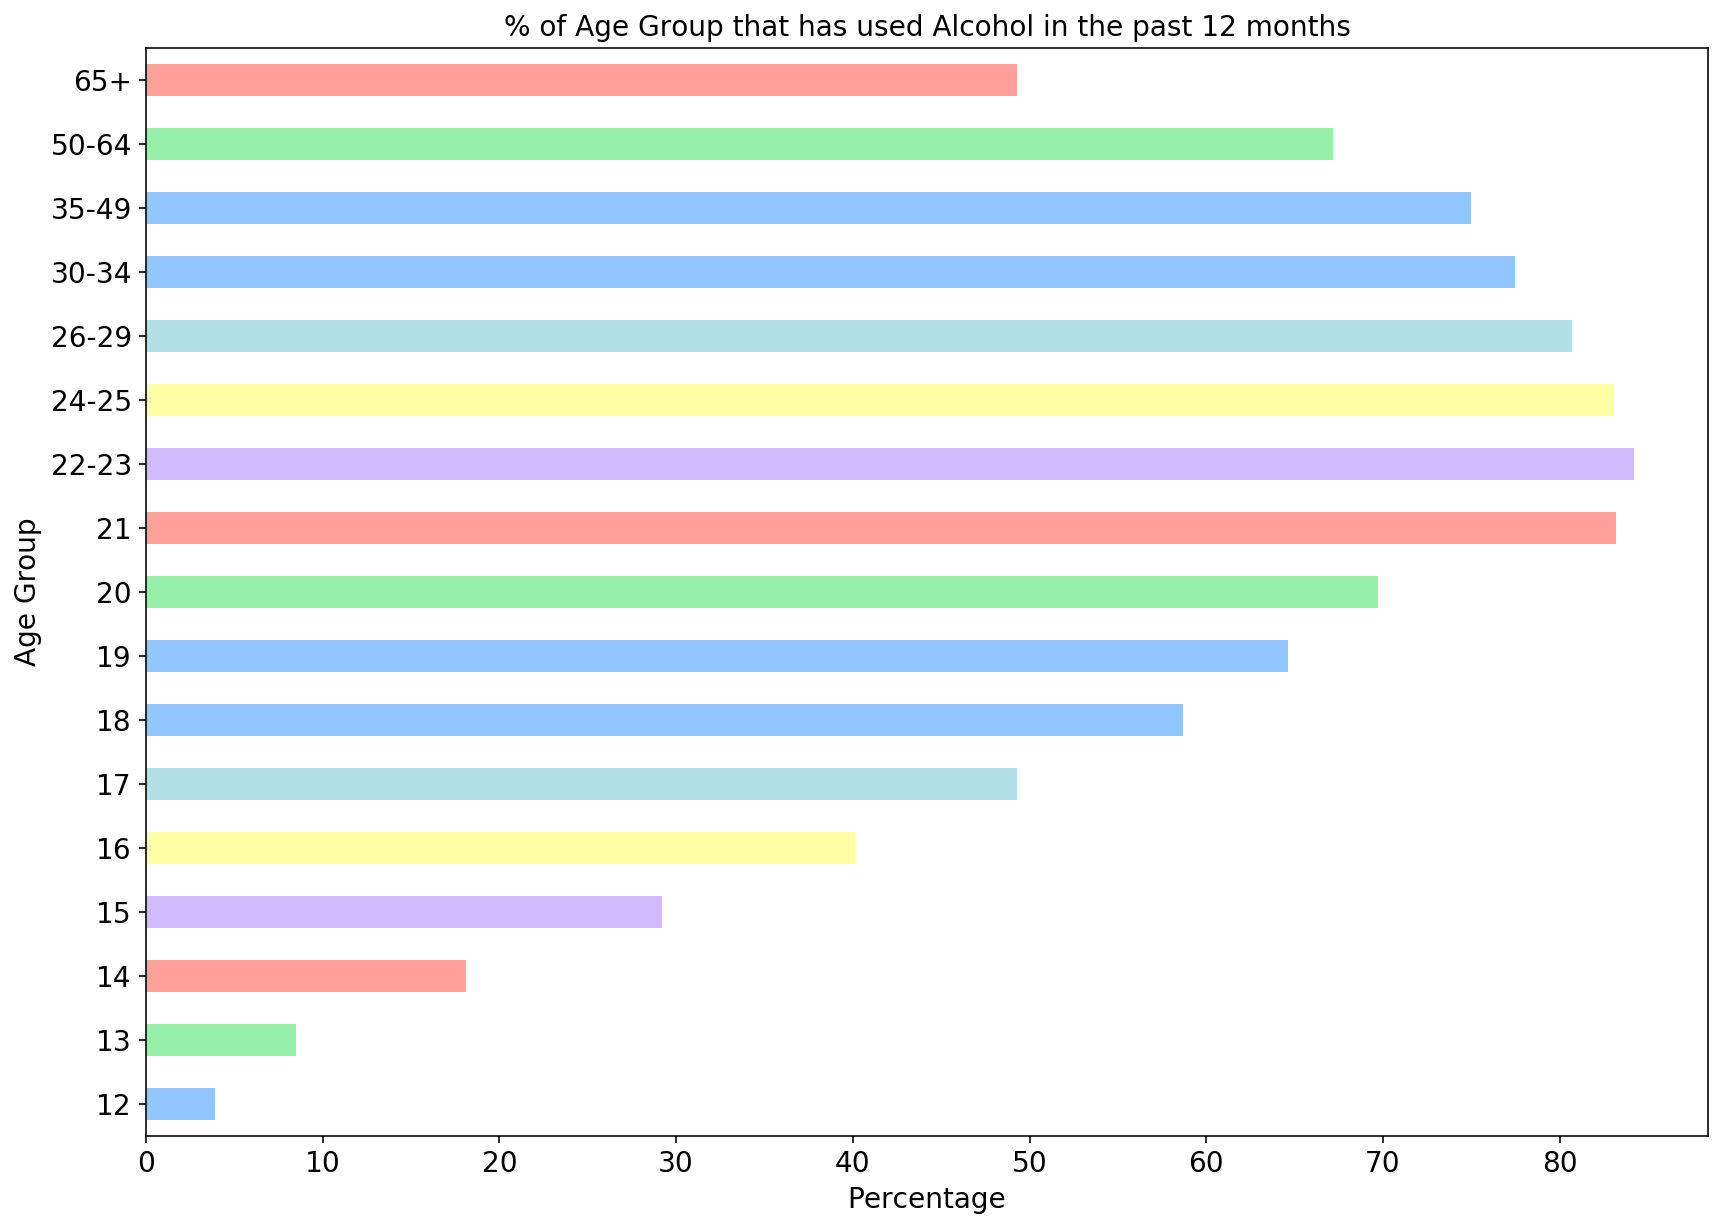

In [39]:
drug_use_grp = drugs_use['alcohol-use'].plot(kind='barh',figsize = (14,10),fontsize =14);


#define titles and axis labels
plt.title('% of Age Group that has used Alcohol in the past 12 months',fontsize=14)
plt.ylabel('Age Group', fontsize=14)
plt.xlabel('Percentage',fontsize=14)
plt.yticks(np.arange(17),drugs_use['age']);

In [40]:
drug_use_top5 = drugs_use['alcohol-use'].sort_values(axis=0,ascending=True).tail(5)
drug_use_top5

13    77.5
12    80.7
11    83.1
9     83.2
10    84.2
Name: alcohol-use, dtype: float64

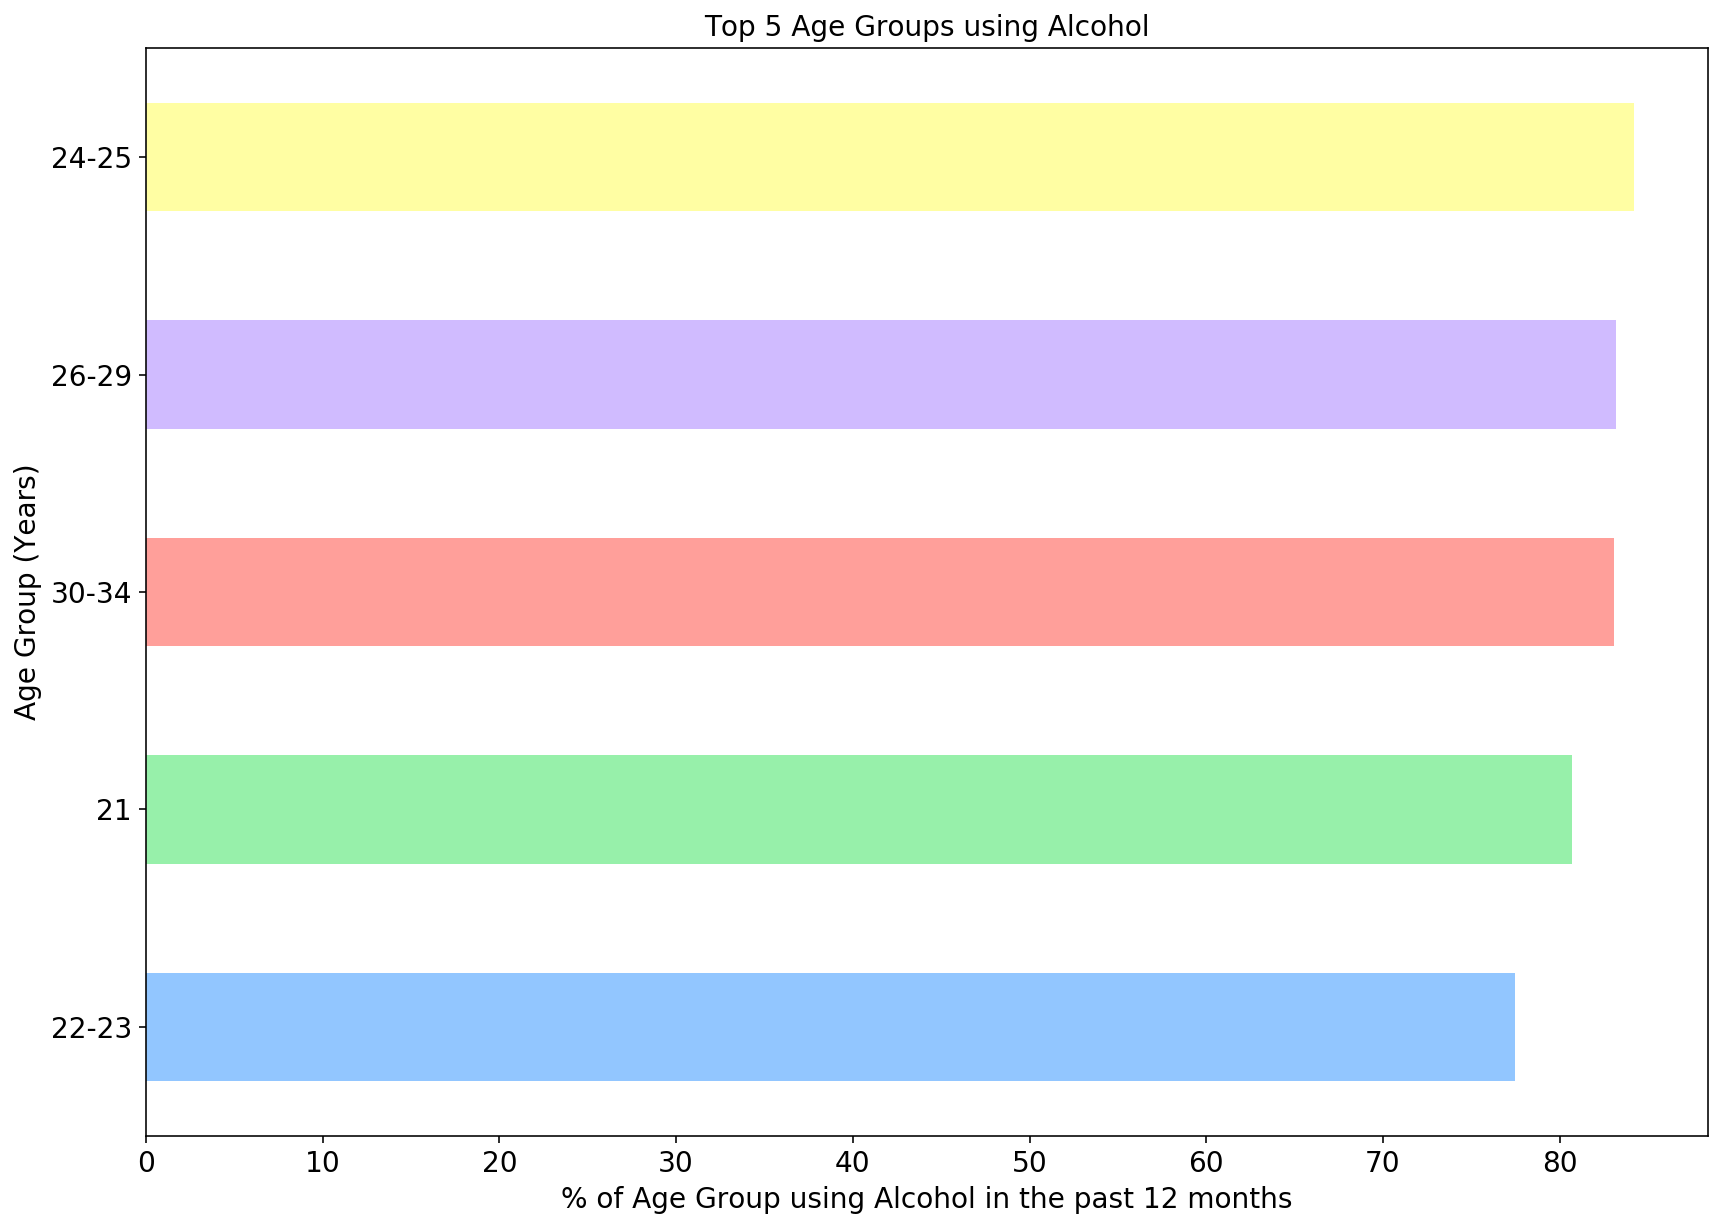

In [41]:
#top 5 age groups by alcohol use rate
drug_use_top5 = drugs_use['alcohol-use'].sort_values(axis=0,ascending=True).tail(5).plot(kind='barh',figsize = (14,10),fontsize =14);


#define titles and axis labels
plt.title('Top 5 Age Groups using Alcohol',fontsize=14)
plt.ylabel('Age Group (Years)', fontsize=14)
plt.xlabel('% of Age Group using Alcohol in the past 12 months',fontsize=14)
plt.yticks(np.arange(5),('22-23','21','30-34','26-29','24-25'));


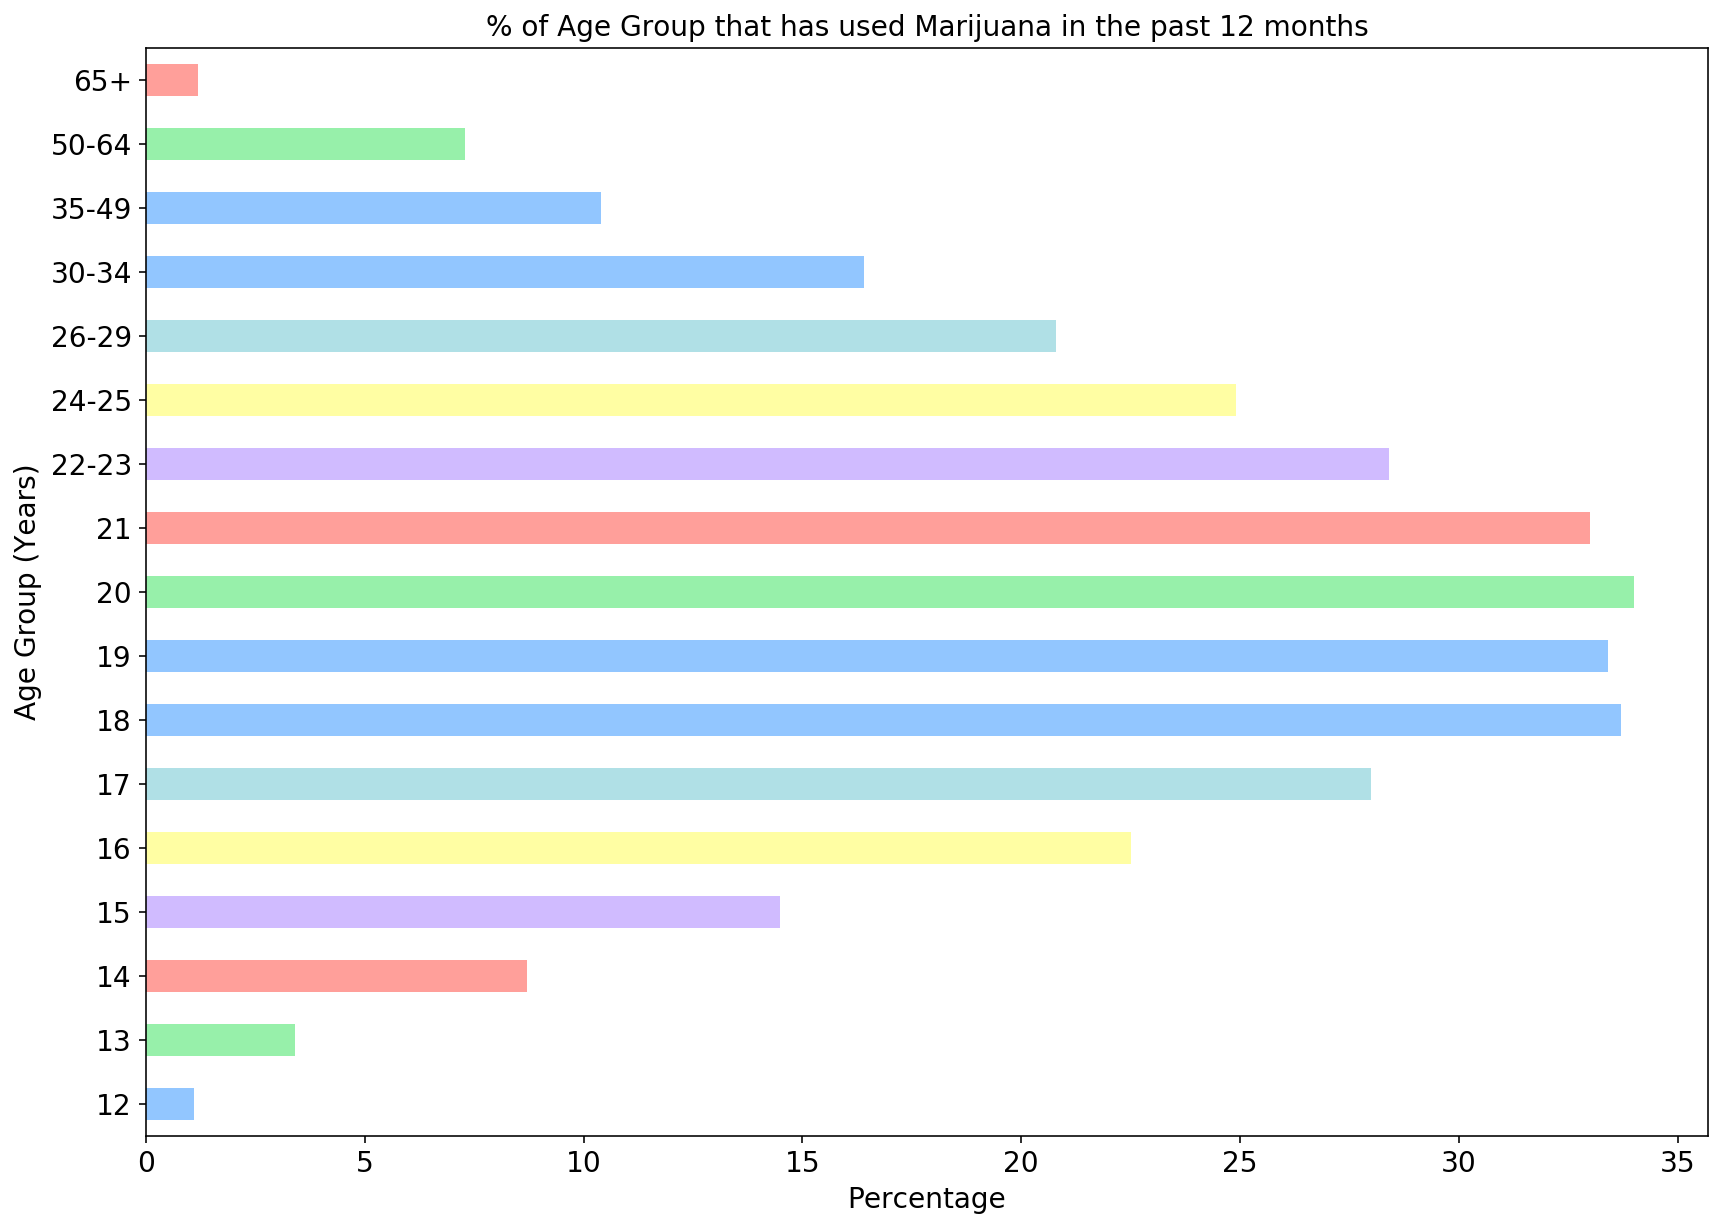

In [42]:
drug_use_grp = drugs_use['marijuana-use'].plot(kind='barh',figsize = (14,10),fontsize =14);


#define titles and axis labels
plt.title('% of Age Group that has used Marijuana in the past 12 months',fontsize=14)
plt.ylabel('Age Group (Years)', fontsize=14)
plt.xlabel('Percentage',fontsize=14)
plt.yticks(np.arange(17),drugs_use['age']);

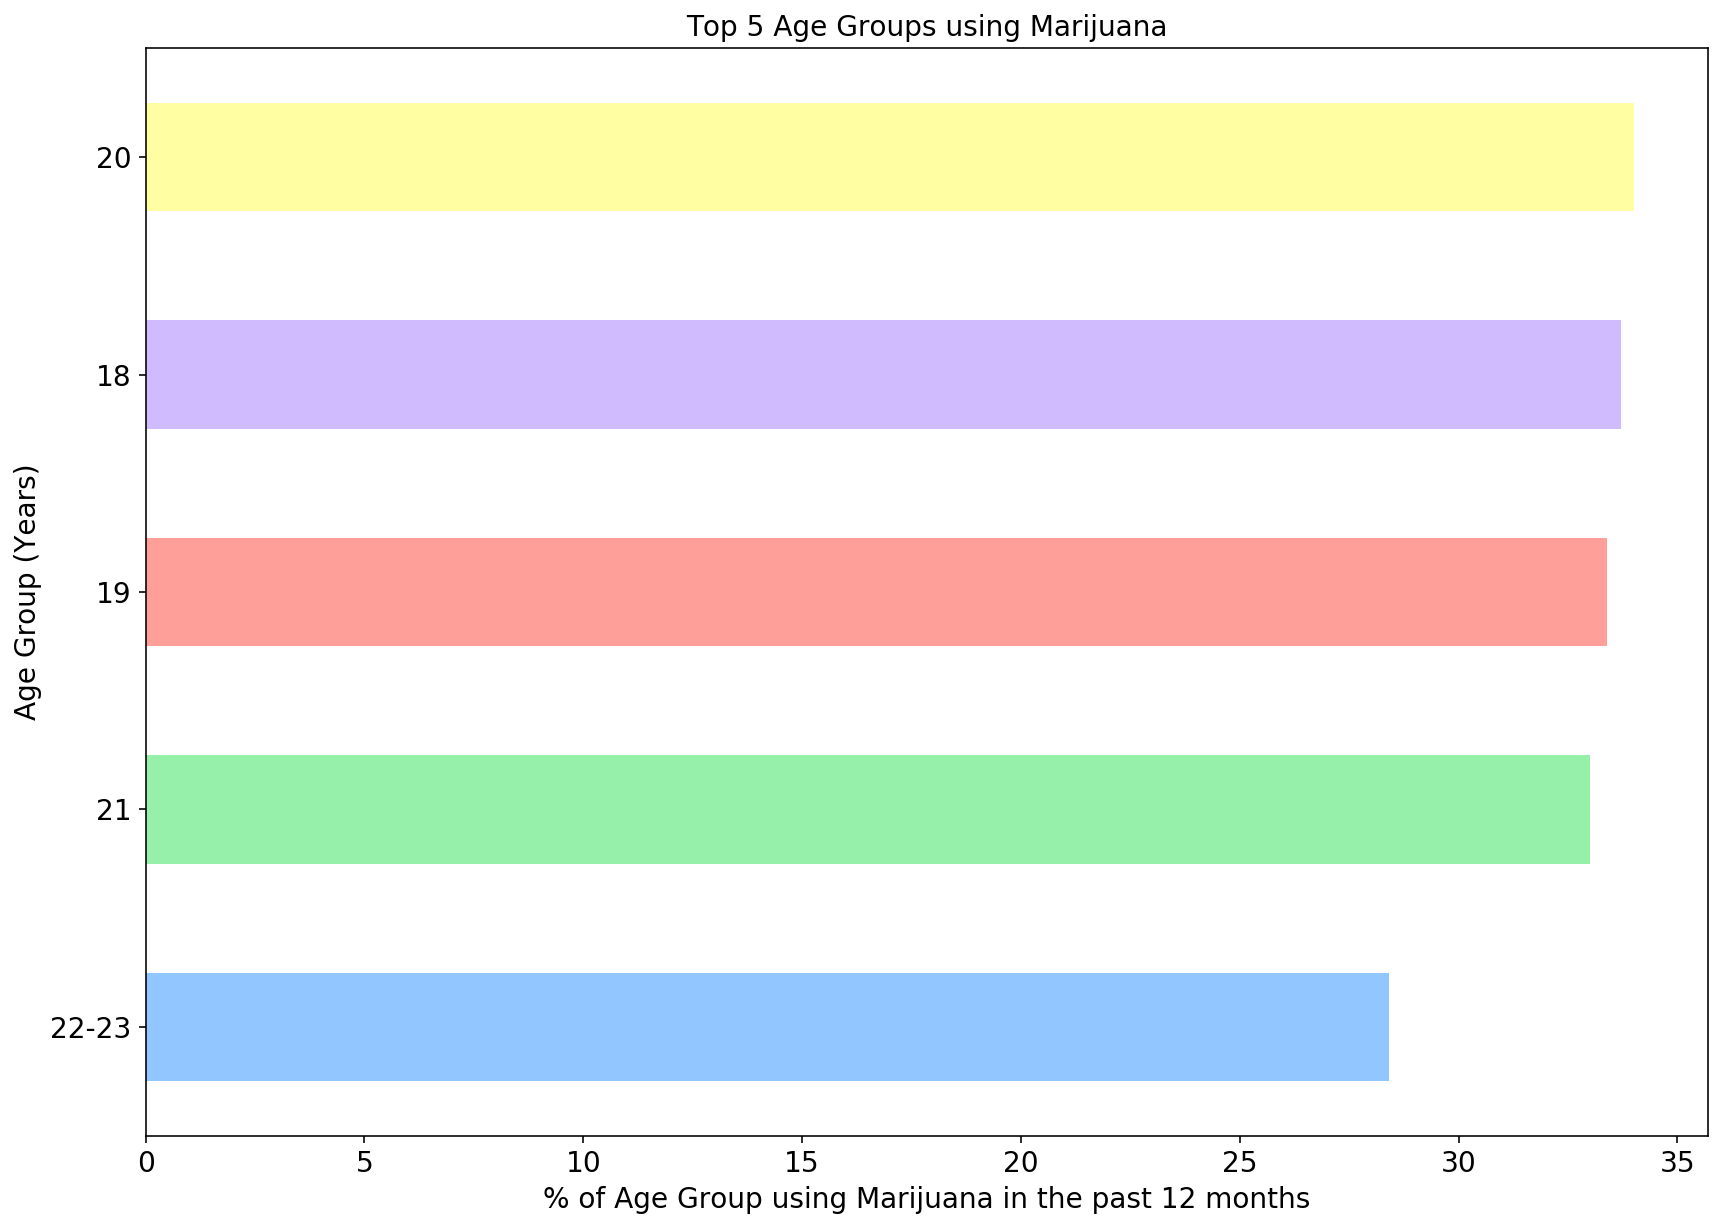

In [43]:
#top 5 age groups by marijuana use rate
drug_use_top5 = drugs_use['marijuana-use'].sort_values(axis=0,ascending=True).tail(5).plot(kind='barh',figsize = (14,10),fontsize =14);


#define titles and axis labels
plt.title('Top 5 Age Groups using Marijuana',fontsize=14)
plt.ylabel('Age Group (Years)', fontsize=14)
plt.xlabel('% of Age Group using Marijuana in the past 12 months',fontsize=14)
plt.yticks(np.arange(5),('22-23','21','19','18','20'));

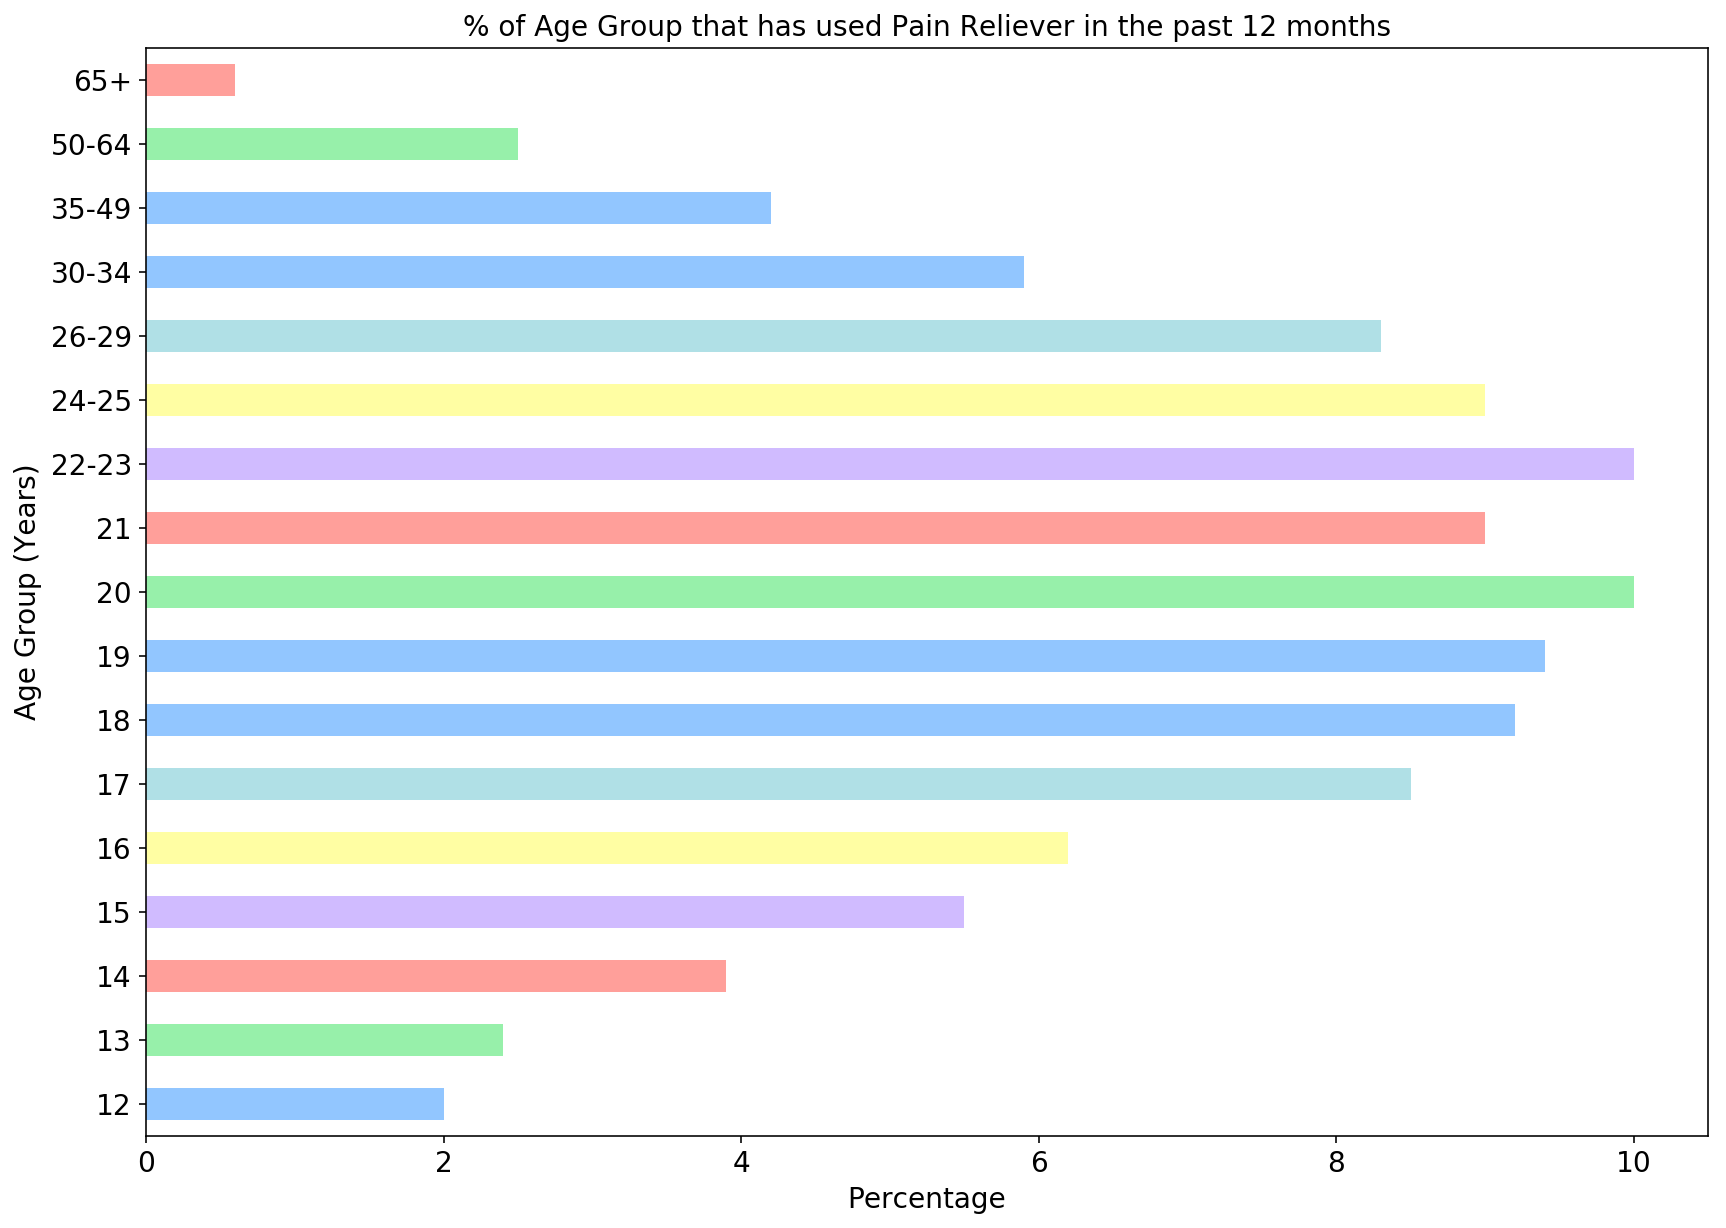

In [44]:
drug_use_grp = drugs_use['pain-reliever-use'].plot(kind='barh',figsize = (14,10),fontsize =14);


#define titles and axis labels
plt.title('% of Age Group that has used Pain Reliever in the past 12 months',fontsize=14)
plt.ylabel('Age Group (Years)', fontsize=14)
plt.xlabel('Percentage',fontsize=14)
plt.yticks(np.arange(17),drugs_use['age']);

In [45]:
drugs_use['pain-reliever-use'].sort_values(axis=0,ascending=True).tail(5)

11     9.0
6      9.2
7      9.4
10    10.0
8     10.0
Name: pain-reliever-use, dtype: float64

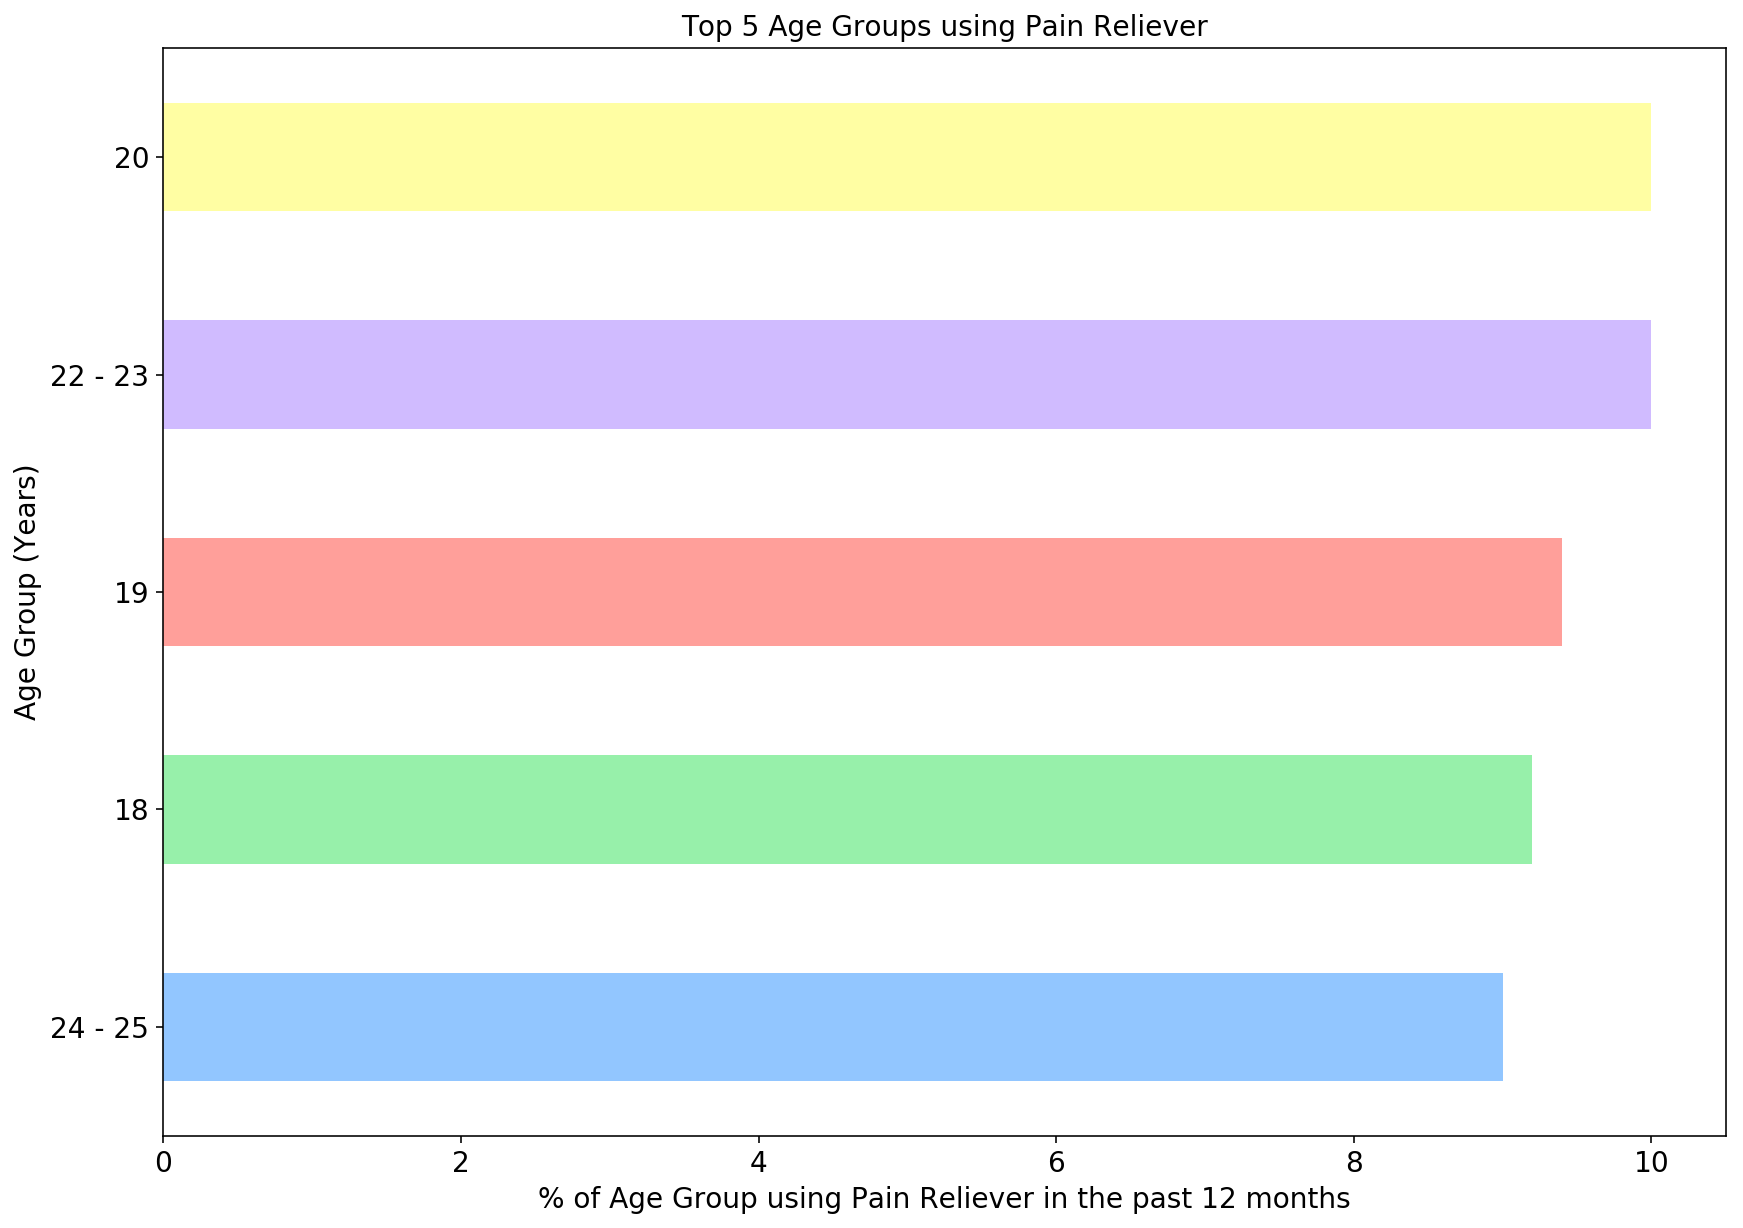

In [46]:
#top 5 age groups by cocaine use rate
drug_use_top5 = drugs_use['pain-reliever-use'].sort_values(axis=0,ascending=True).tail(5).plot(kind='barh',figsize = (14,10),fontsize =14);


#define titles and axis labels
plt.title('Top 5 Age Groups using Pain Reliever',fontsize=14)
plt.ylabel('Age Group (Years)', fontsize=14)
plt.xlabel('% of Age Group using Pain Reliever in the past 12 months',fontsize=14)
plt.yticks(np.arange(5),('24 - 25','18','19','22 - 23','20'));

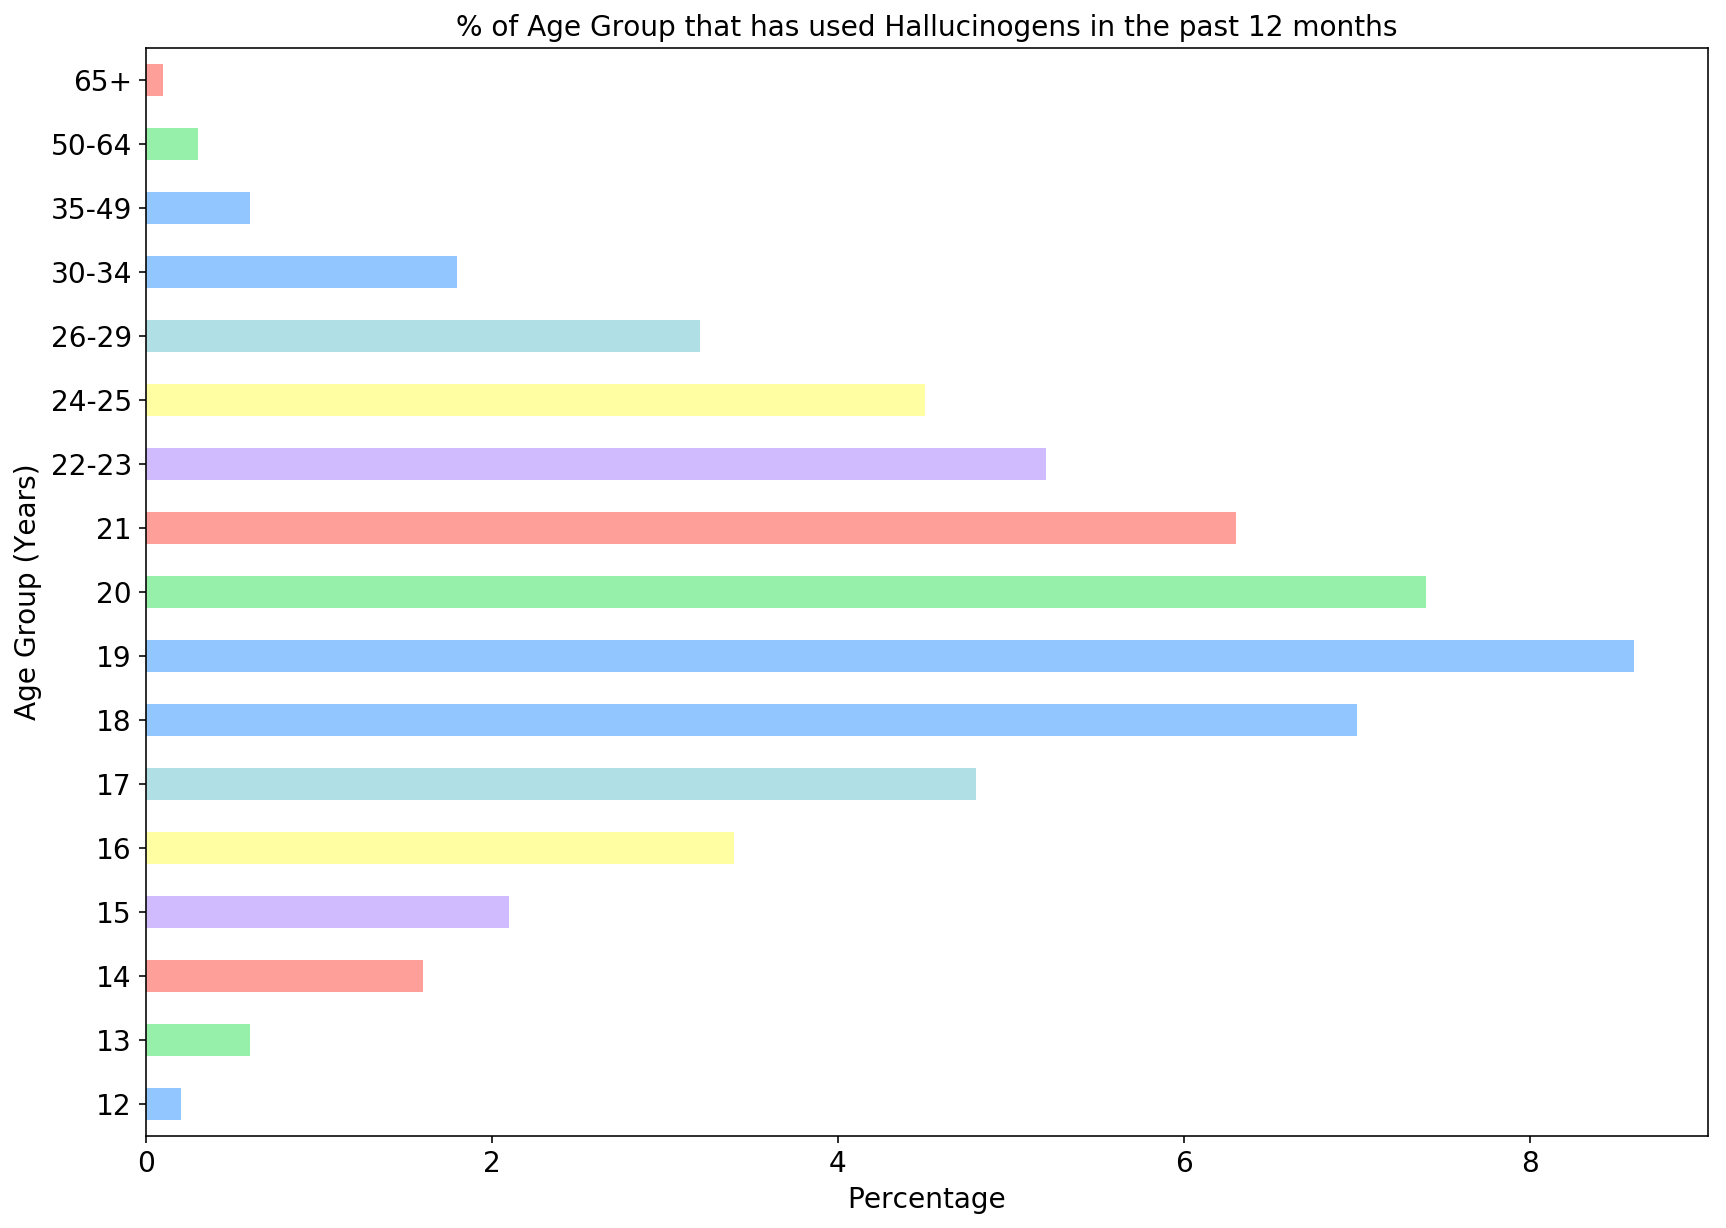

In [47]:
drug_use_grp = drugs_use['hallucinogen-use'].plot(kind='barh',figsize = (14,10),fontsize =14);


#define titles and axis labels
plt.title('% of Age Group that has used Hallucinogens in the past 12 months',fontsize=14)
plt.ylabel('Age Group (Years)', fontsize=14)
plt.xlabel('Percentage',fontsize=14)
plt.yticks(np.arange(17),drugs_use['age']);

In [48]:
drugs_use['tranquilizer-use'].sort_values(axis=0,ascending=True).tail(5)

12    4.2
11    4.3
10    4.4
6     4.9
8     5.4
Name: tranquilizer-use, dtype: float64

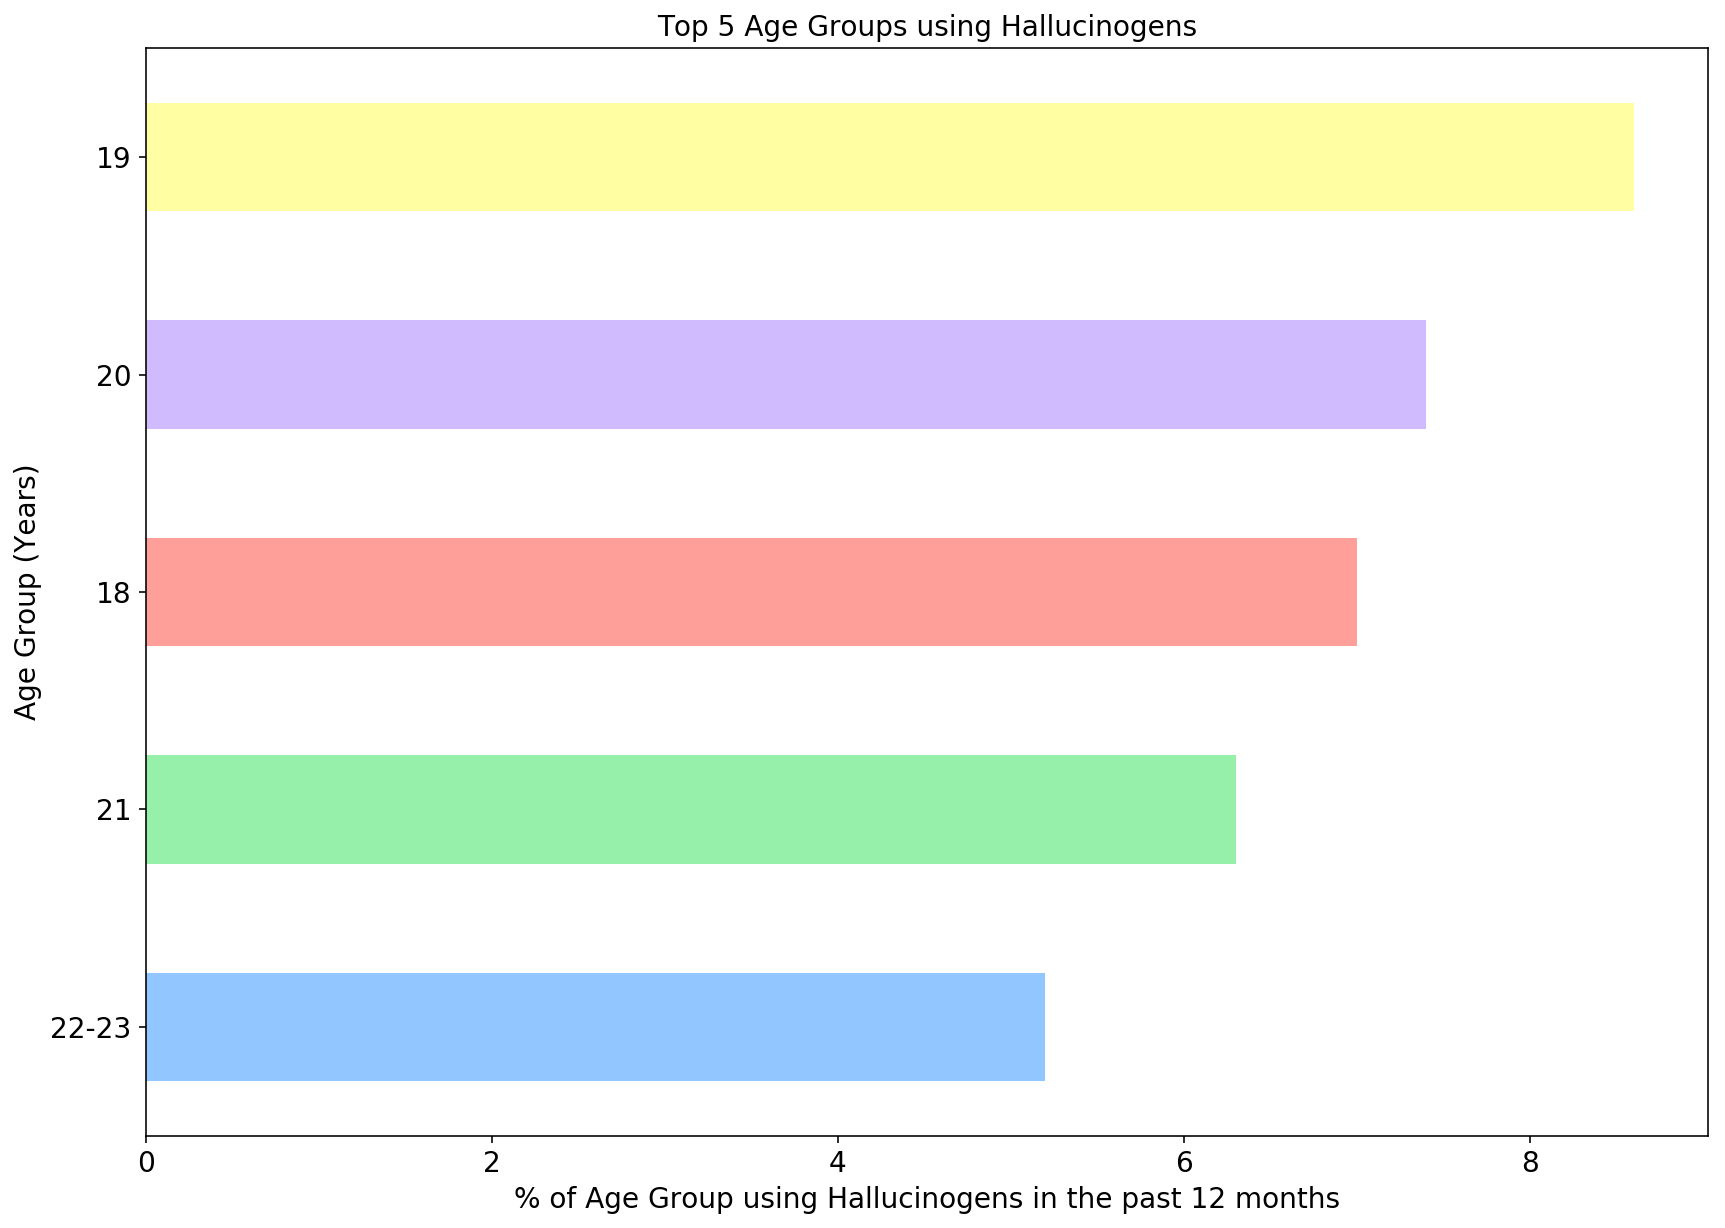

In [49]:
#top 5 age groups by hallucinogen
drug_use_top5 = drugs_use['hallucinogen-use'].sort_values(axis=0,ascending=True).tail(5).plot(kind='barh',figsize = (14,10),fontsize =14);


#define titles and axis labels
plt.title('Top 5 Age Groups using Hallucinogens',fontsize=14)
plt.ylabel('Age Group (Years)', fontsize=14)
plt.xlabel('% of Age Group using Hallucinogens in the past 12 months',fontsize=14)
plt.yticks(np.arange(5),('22-23','21','18','20','19'));

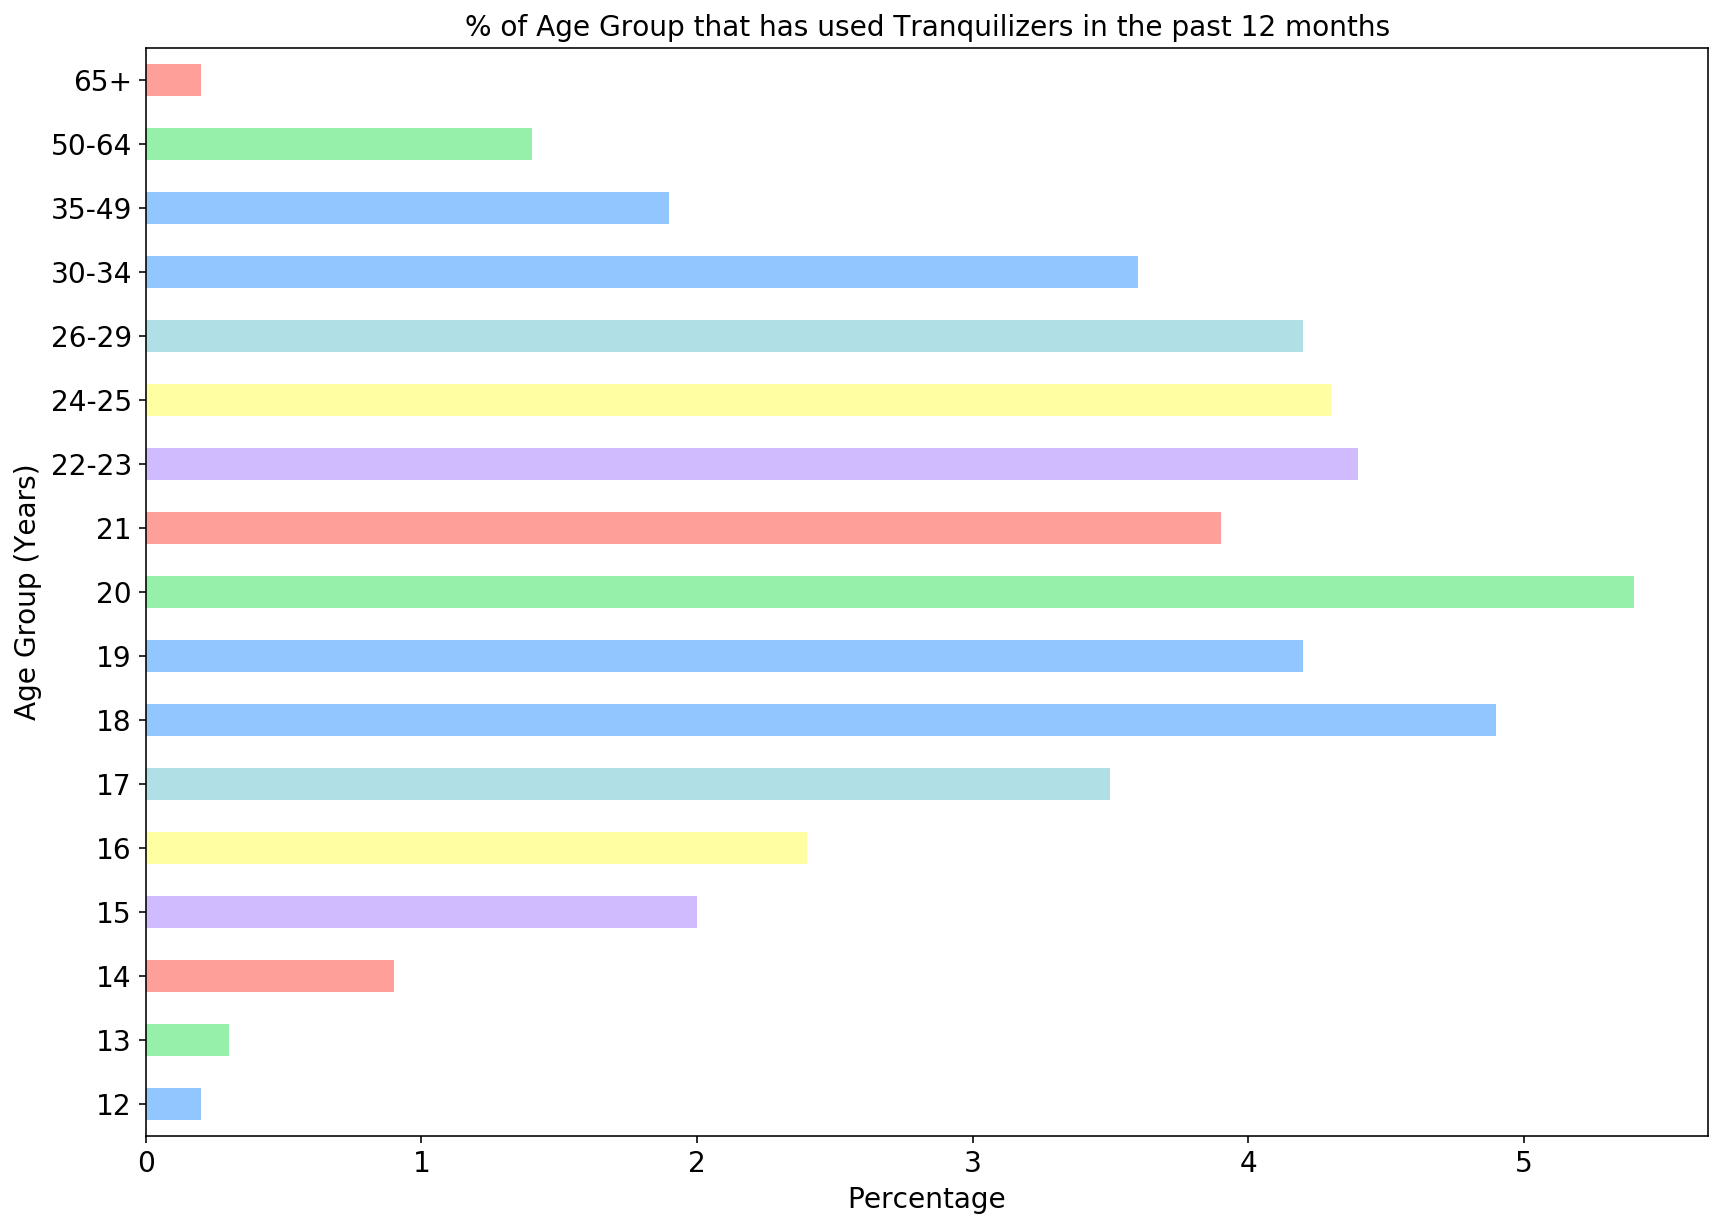

In [50]:
drug_use_grp = drugs_use['tranquilizer-use'].plot(kind='barh',figsize = (14,10),fontsize =14);


#define titles and axis labels
plt.title('% of Age Group that has used Tranquilizers in the past 12 months',fontsize=14)
plt.ylabel('Age Group (Years)', fontsize=14)
plt.xlabel('Percentage',fontsize=14)
plt.yticks(np.arange(17),drugs_use['age']);

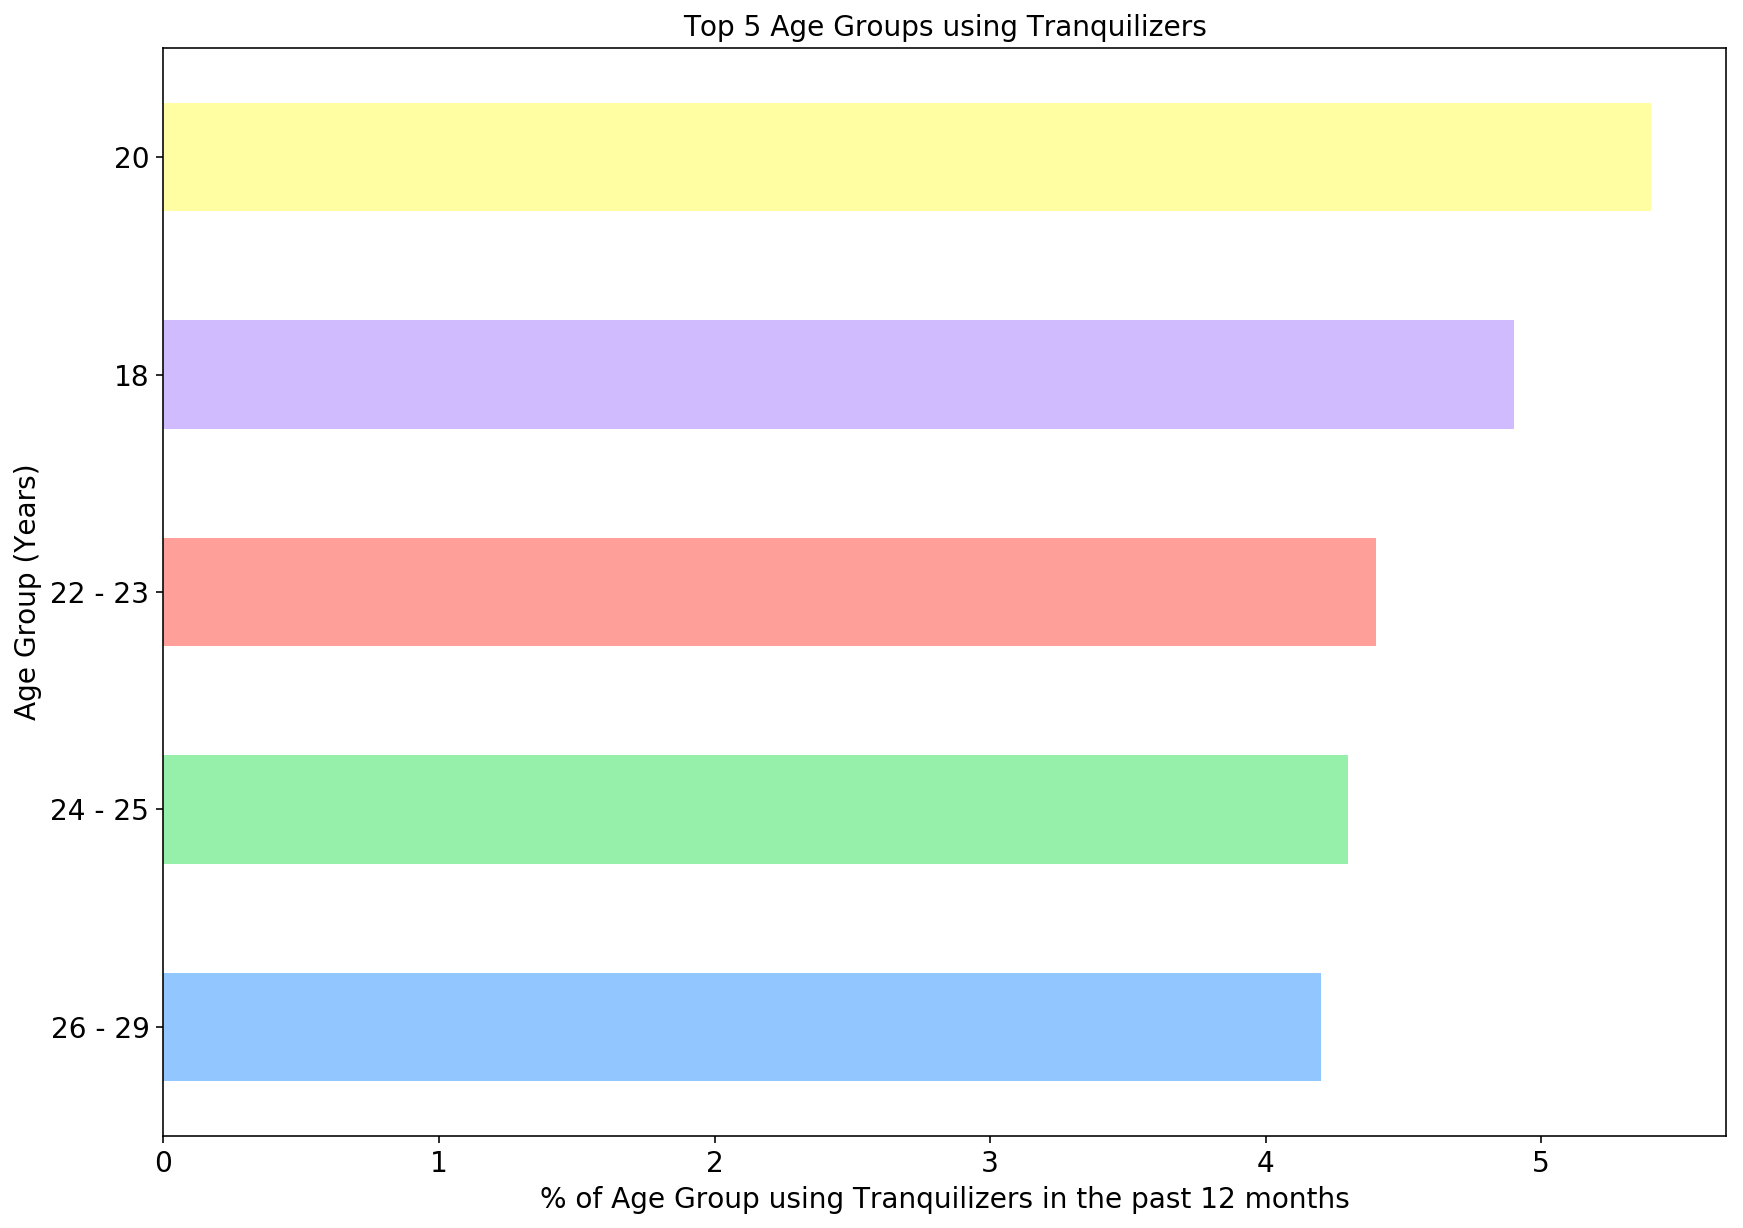

In [51]:
#top 5 age groups by tranquilizers
drug_use_top5 = drugs_use['tranquilizer-use'].sort_values(axis=0,ascending=True).tail(5).plot(kind='barh',figsize = (14,10),fontsize =14);


#define titles and axis labels
plt.title('Top 5 Age Groups using Tranquilizers',fontsize=14)
plt.ylabel('Age Group (Years)', fontsize=14)
plt.xlabel('% of Age Group using Tranquilizers in the past 12 months',fontsize=14)
plt.yticks(np.arange(5),('26 - 29','24 - 25','22 - 23','18','20'));

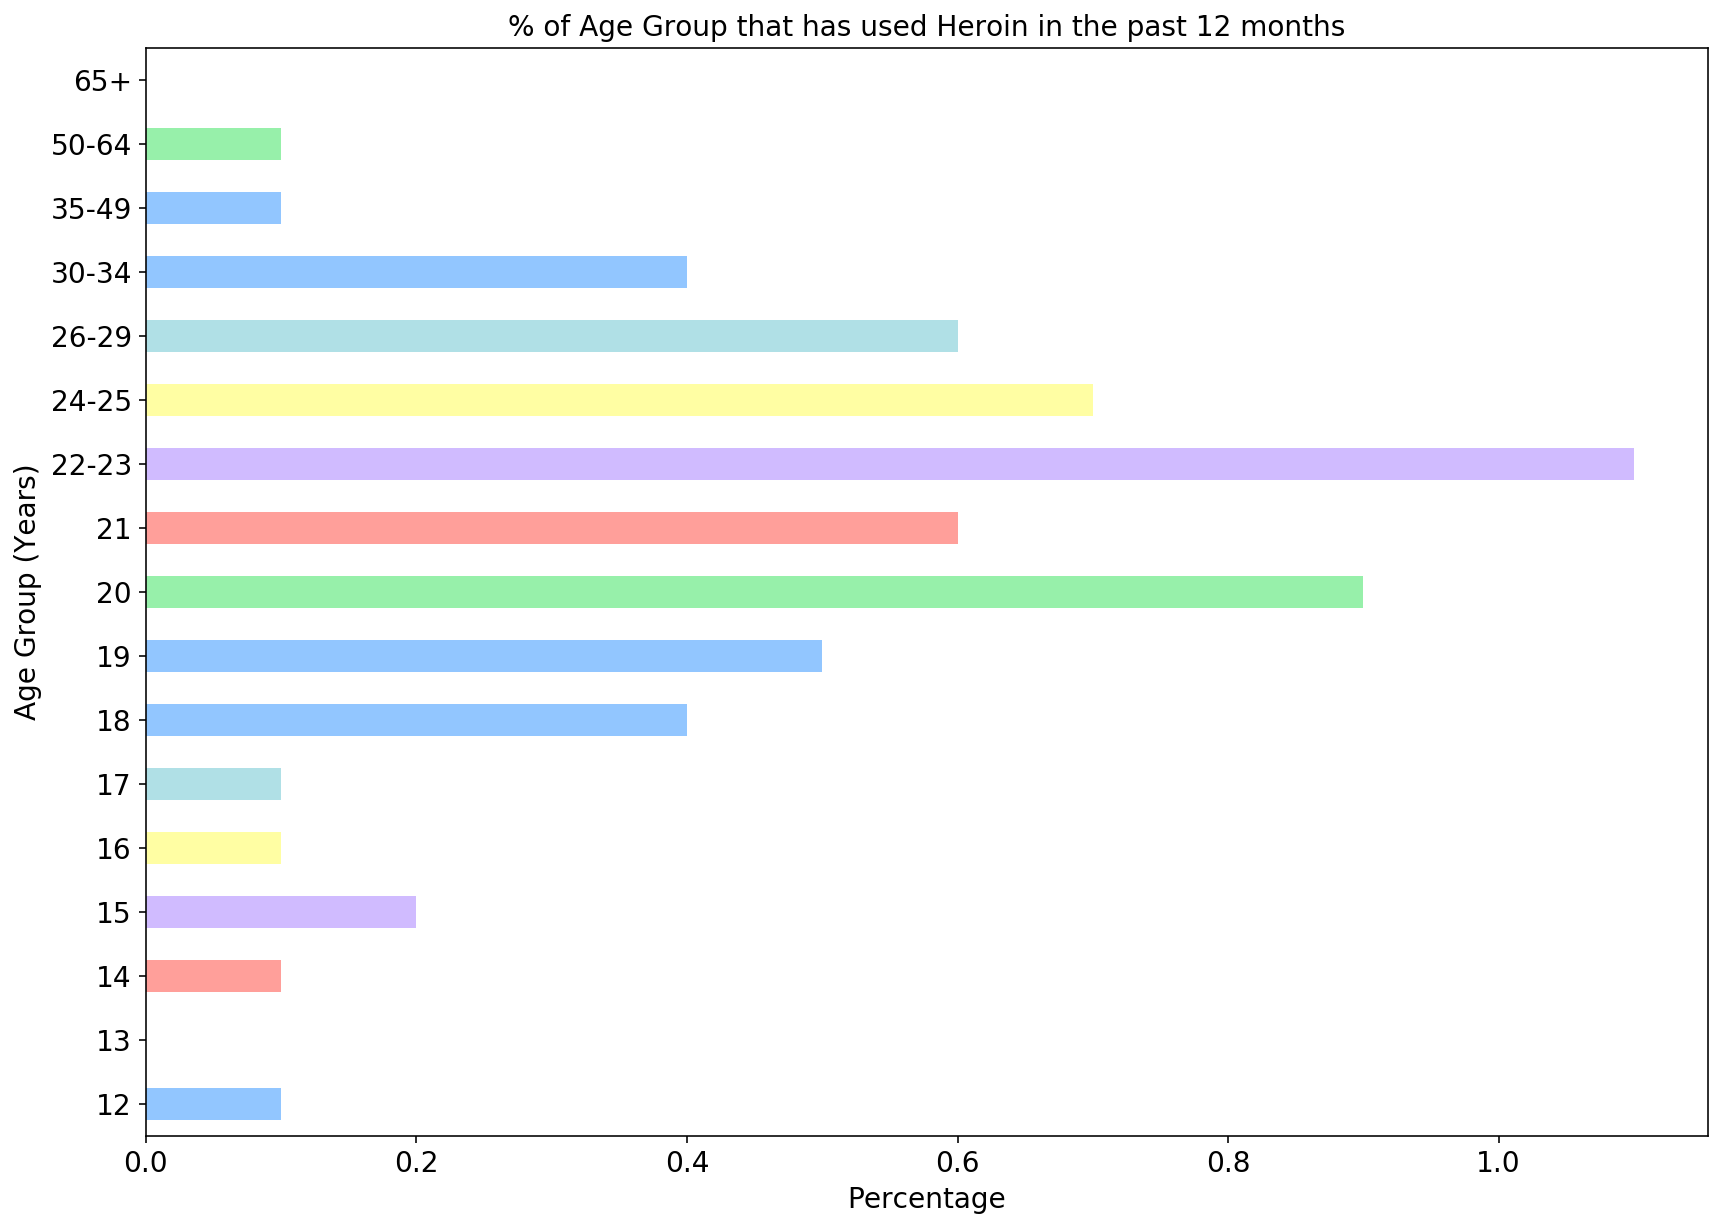

In [52]:
drug_use_grp = drugs_use['heroin-use'].plot(kind='barh',figsize = (14,10),fontsize =14);


#define titles and axis labels
plt.title('% of Age Group that has used Heroin in the past 12 months',fontsize=14)
plt.ylabel('Age Group (Years)', fontsize=14)
plt.xlabel('Percentage',fontsize=14)
plt.yticks(np.arange(17),drugs_use['age']);

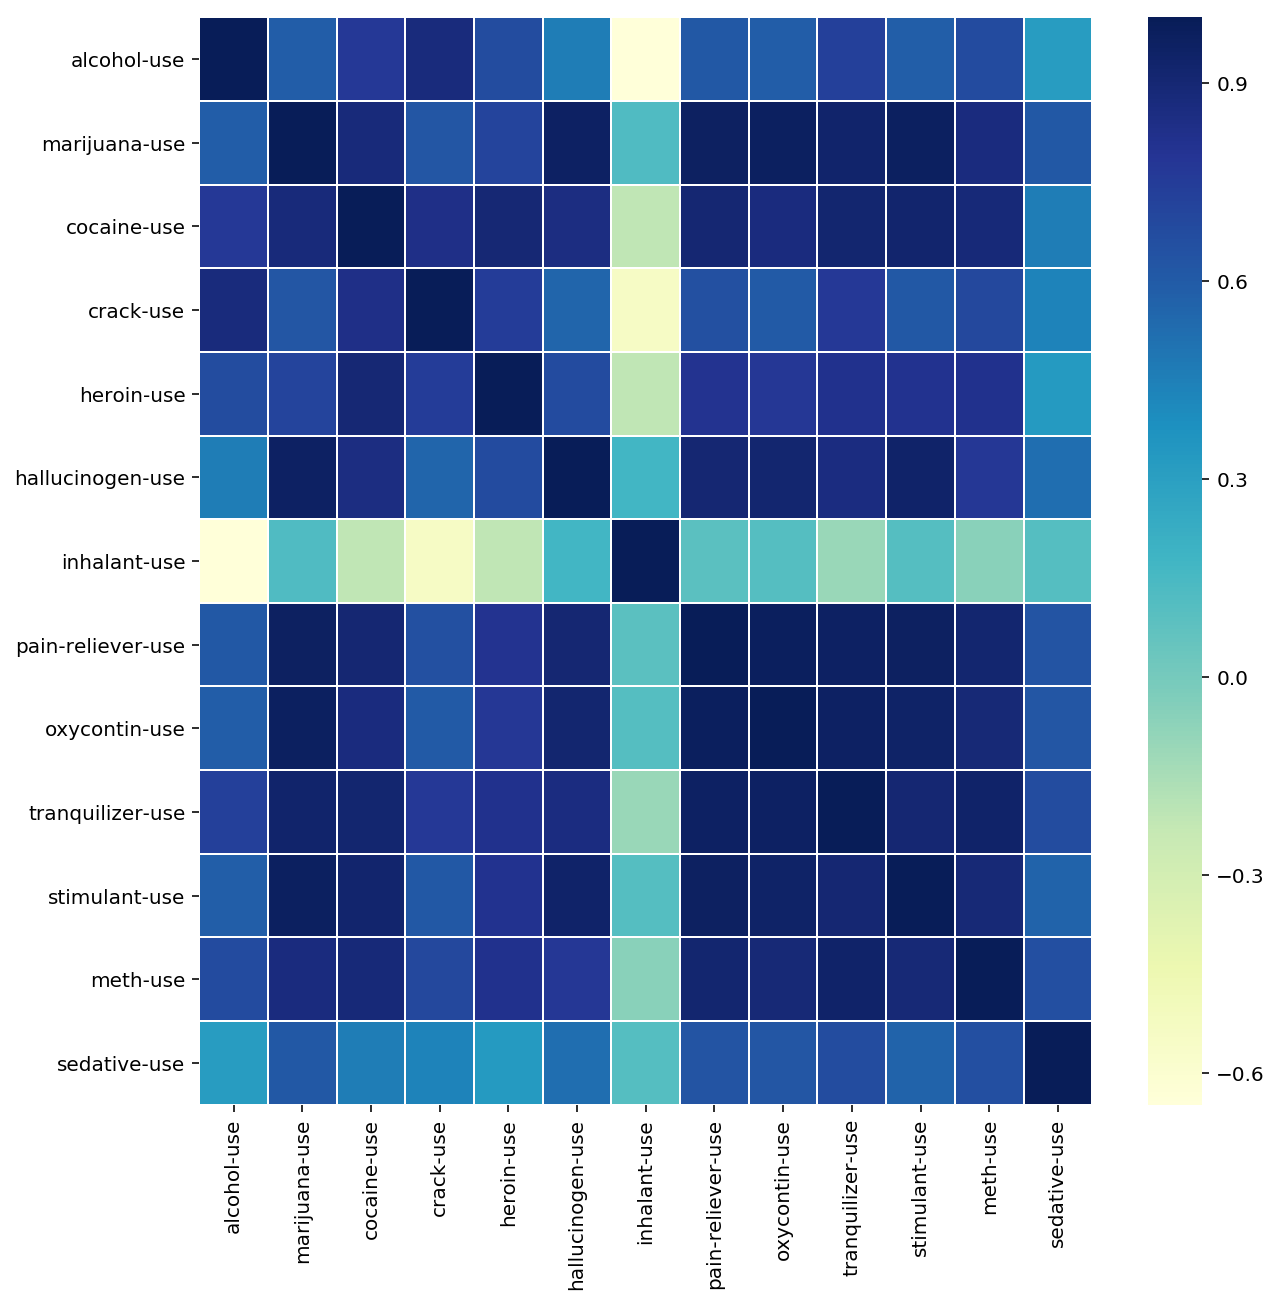

In [53]:
# A:
#create the correlation matrix of % drug users to see if the usage of any two drugs is strongly correlated

fig, ax = plt.subplots(figsize=(10,10))    

corr_matrix = drugs_use.corr()

corr_matrix

sns.heatmap(corr_matrix, linewidths=.5, cmap="YlGnBu", ax=ax)

In [54]:
# See the correlations in descending order to see which variables are most strongly correlated

corr = drugs_use.corr() 
c1 = corr.abs().unstack()
c1.sort_values(ascending = False)

sedative-use       sedative-use         1.000000
meth-use           meth-use             1.000000
marijuana-use      marijuana-use        1.000000
cocaine-use        cocaine-use          1.000000
crack-use          crack-use            1.000000
heroin-use         heroin-use           1.000000
hallucinogen-use   hallucinogen-use     1.000000
pain-reliever-use  pain-reliever-use    1.000000
oxycontin-use      oxycontin-use        1.000000
tranquilizer-use   tranquilizer-use     1.000000
stimulant-use      stimulant-use        1.000000
inhalant-use       inhalant-use         1.000000
alcohol-use        alcohol-use          1.000000
pain-reliever-use  oxycontin-use        0.976445
oxycontin-use      pain-reliever-use    0.976445
                   marijuana-use        0.971733
marijuana-use      oxycontin-use        0.971733
stimulant-use      marijuana-use        0.968096
marijuana-use      stimulant-use        0.968096
pain-reliever-use  marijuana-use        0.966226
marijuana-use      p

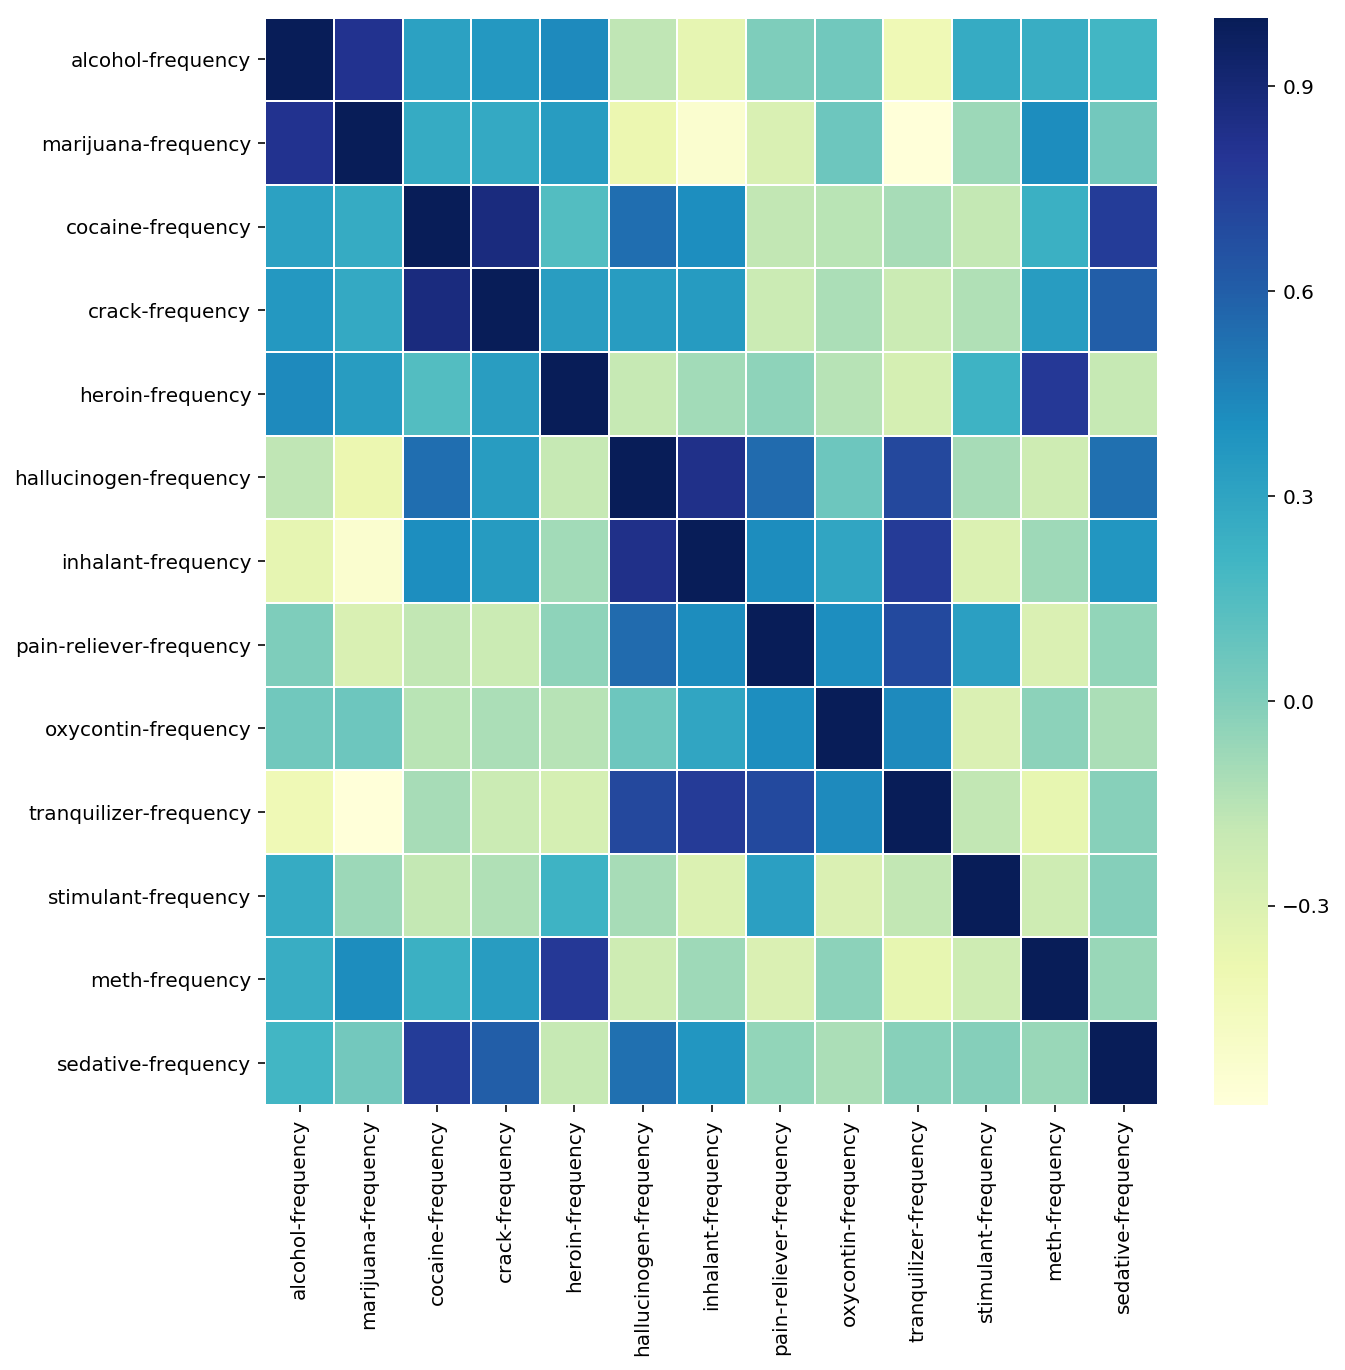

In [55]:
# A:
#create the correlation matrix of frequency of drug usage

fig, ax = plt.subplots(figsize=(10,10))    

corr_matrix = drugs_freq.corr()

corr_matrix

sns.heatmap(corr_matrix, linewidths=.5, cmap="YlGnBu", ax=ax)

In [56]:
# See the correlations in descending order to see which variables are most strongly correlated

corr = drugs_freq.corr() # df is the pandas dataframe
c1 = corr.abs().unstack()
c1.sort_values(ascending = False)

sedative-frequency       sedative-frequency         1.000000
meth-frequency           meth-frequency             1.000000
marijuana-frequency      marijuana-frequency        1.000000
cocaine-frequency        cocaine-frequency          1.000000
crack-frequency          crack-frequency            1.000000
heroin-frequency         heroin-frequency           1.000000
hallucinogen-frequency   hallucinogen-frequency     1.000000
pain-reliever-frequency  pain-reliever-frequency    1.000000
oxycontin-frequency      oxycontin-frequency        1.000000
tranquilizer-frequency   tranquilizer-frequency     1.000000
stimulant-frequency      stimulant-frequency        1.000000
inhalant-frequency       inhalant-frequency         1.000000
alcohol-frequency        alcohol-frequency          1.000000
crack-frequency          cocaine-frequency          0.872260
cocaine-frequency        crack-frequency            0.872260
hallucinogen-frequency   inhalant-frequency         0.834993
inhalant-frequency      

### 7.3 Create a testable hypothesis about this data

Requirements for the question:

1. Write a specific question you would like to answer with the data (that can be accomplished with EDA).
2. Write a description of the "deliverables": what will you report after testing/examining your hypothesis?
3. Use EDA techniques of your choice, numeric and/or visual, to look into your question.
4. Write up your report on what you have found regarding the hypothesis about the data you came up with.


Your hypothesis could be on:

- Difference of group means
- Correlations between variables
- Anything else you think is interesting, testable, and meaningful!

**Important notes:**

You should be only doing EDA _relevant to your question_ here. It is easy to go down rabbit holes trying to look at every facet of your data, and so we want you to get in the practice of specifying a hypothesis you are interested in first and scoping your work to specifically answer that question.

Some of you may want to jump ahead to "modeling" data to answer your question. This is a topic addressed in the next project and **you should not do this for this project.** We specifically want you to not do modeling to emphasize the importance of performing EDA _before_ you jump to statistical analysis.

** Question and deliverables**


...

I want to test the hypothesis if marijuana usage is truly correlated with cocaine usage, and not just due to randomness of the data. From the correlation matrix, the usage of both drugs seem to be highly correlated with each other (coefficient of 0.884)

We assume that column 'n' in the data is the size of population of that age group.

Thus, with the columns 'marijuana-use' and 'cocaine-use', we can get the total number of users of the drug in age group in the past 12 months

It is often said that marijuana is a 'gateway' drug and users of marijuana may progress onto other harder drugs, such as cocaine. With the legalisation of marijuana in many states it might be useful to know if there is truly some correlation between the usage of marijuana and cocaine, especially since marijuana is amongst the top 5 drugs in terms of number of users as well as frequency of usage.

The deliverables of the hypothesis testing are to determine if the correlation of marijuana usage and cocaine usage across the age groups occurred by chance, or if they 

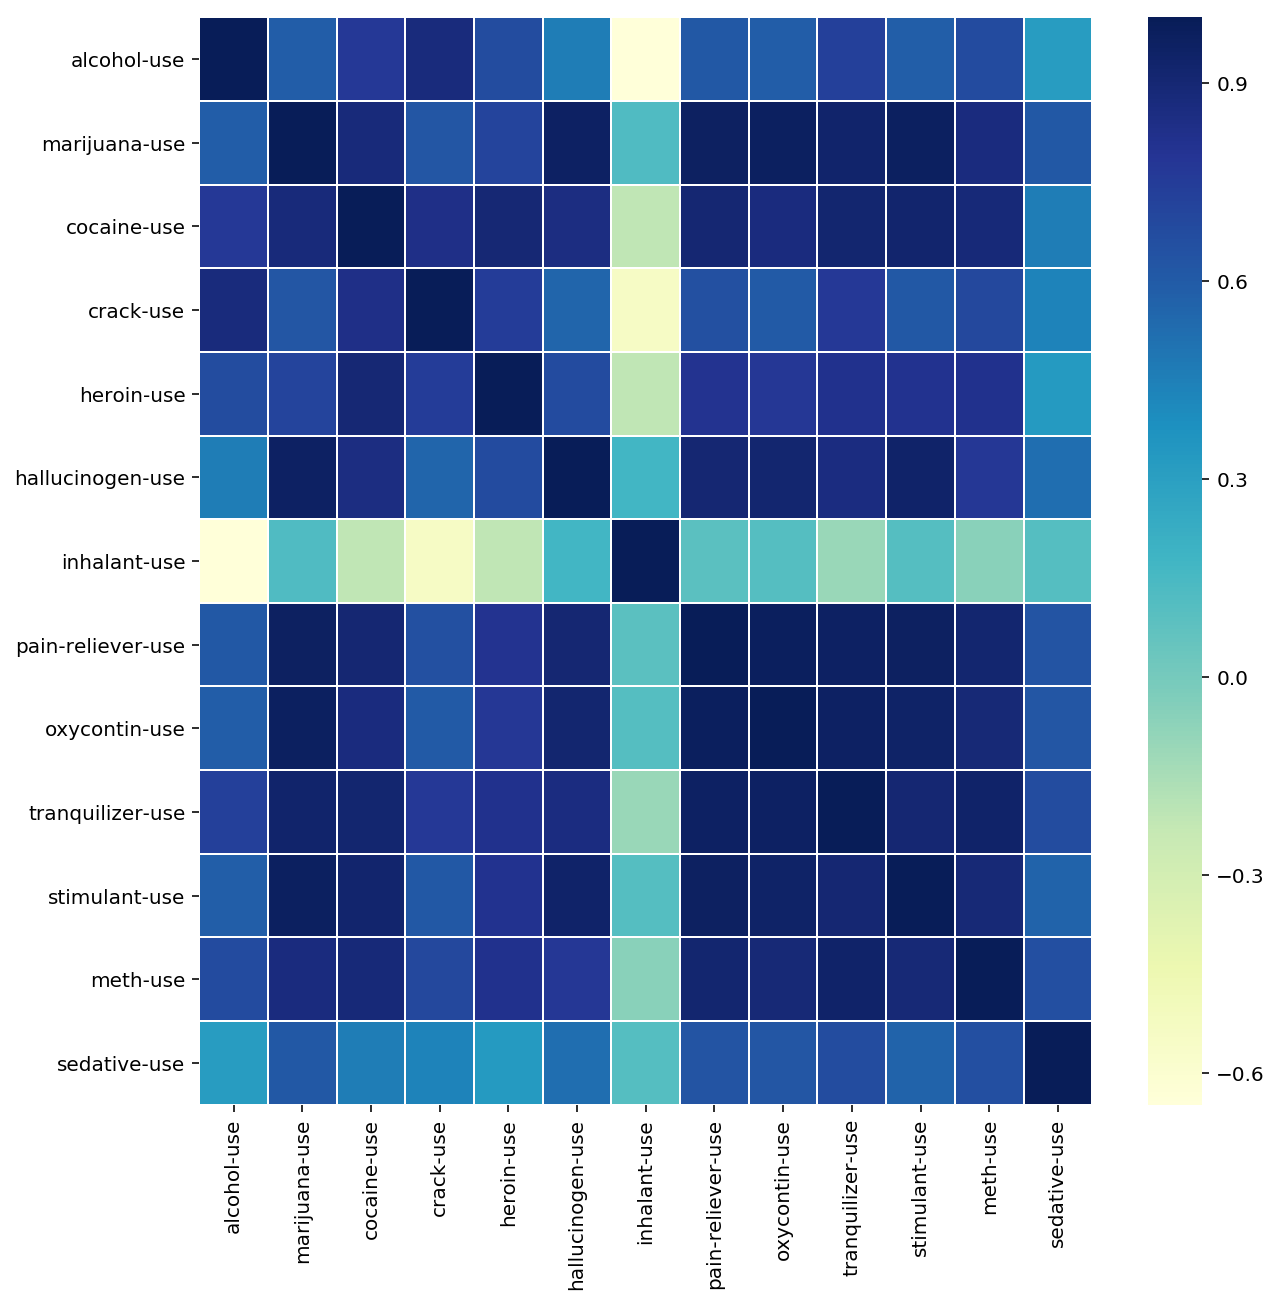

In [57]:
#previously, we had plotted the correlation heatmap of drug usage to see if any of the drugs usage had strong correlation with each other

#it was observed that marijuana usage had a fairly high correlation coefficient with cocaine usage

fig, ax = plt.subplots(figsize=(10,10))    

corr_matrix = drugs_use.corr()

corr_matrix

sns.heatmap(corr_matrix, linewidths=.5, cmap="YlGnBu", ax=ax)


Text(0.5, 0, 'Drug')

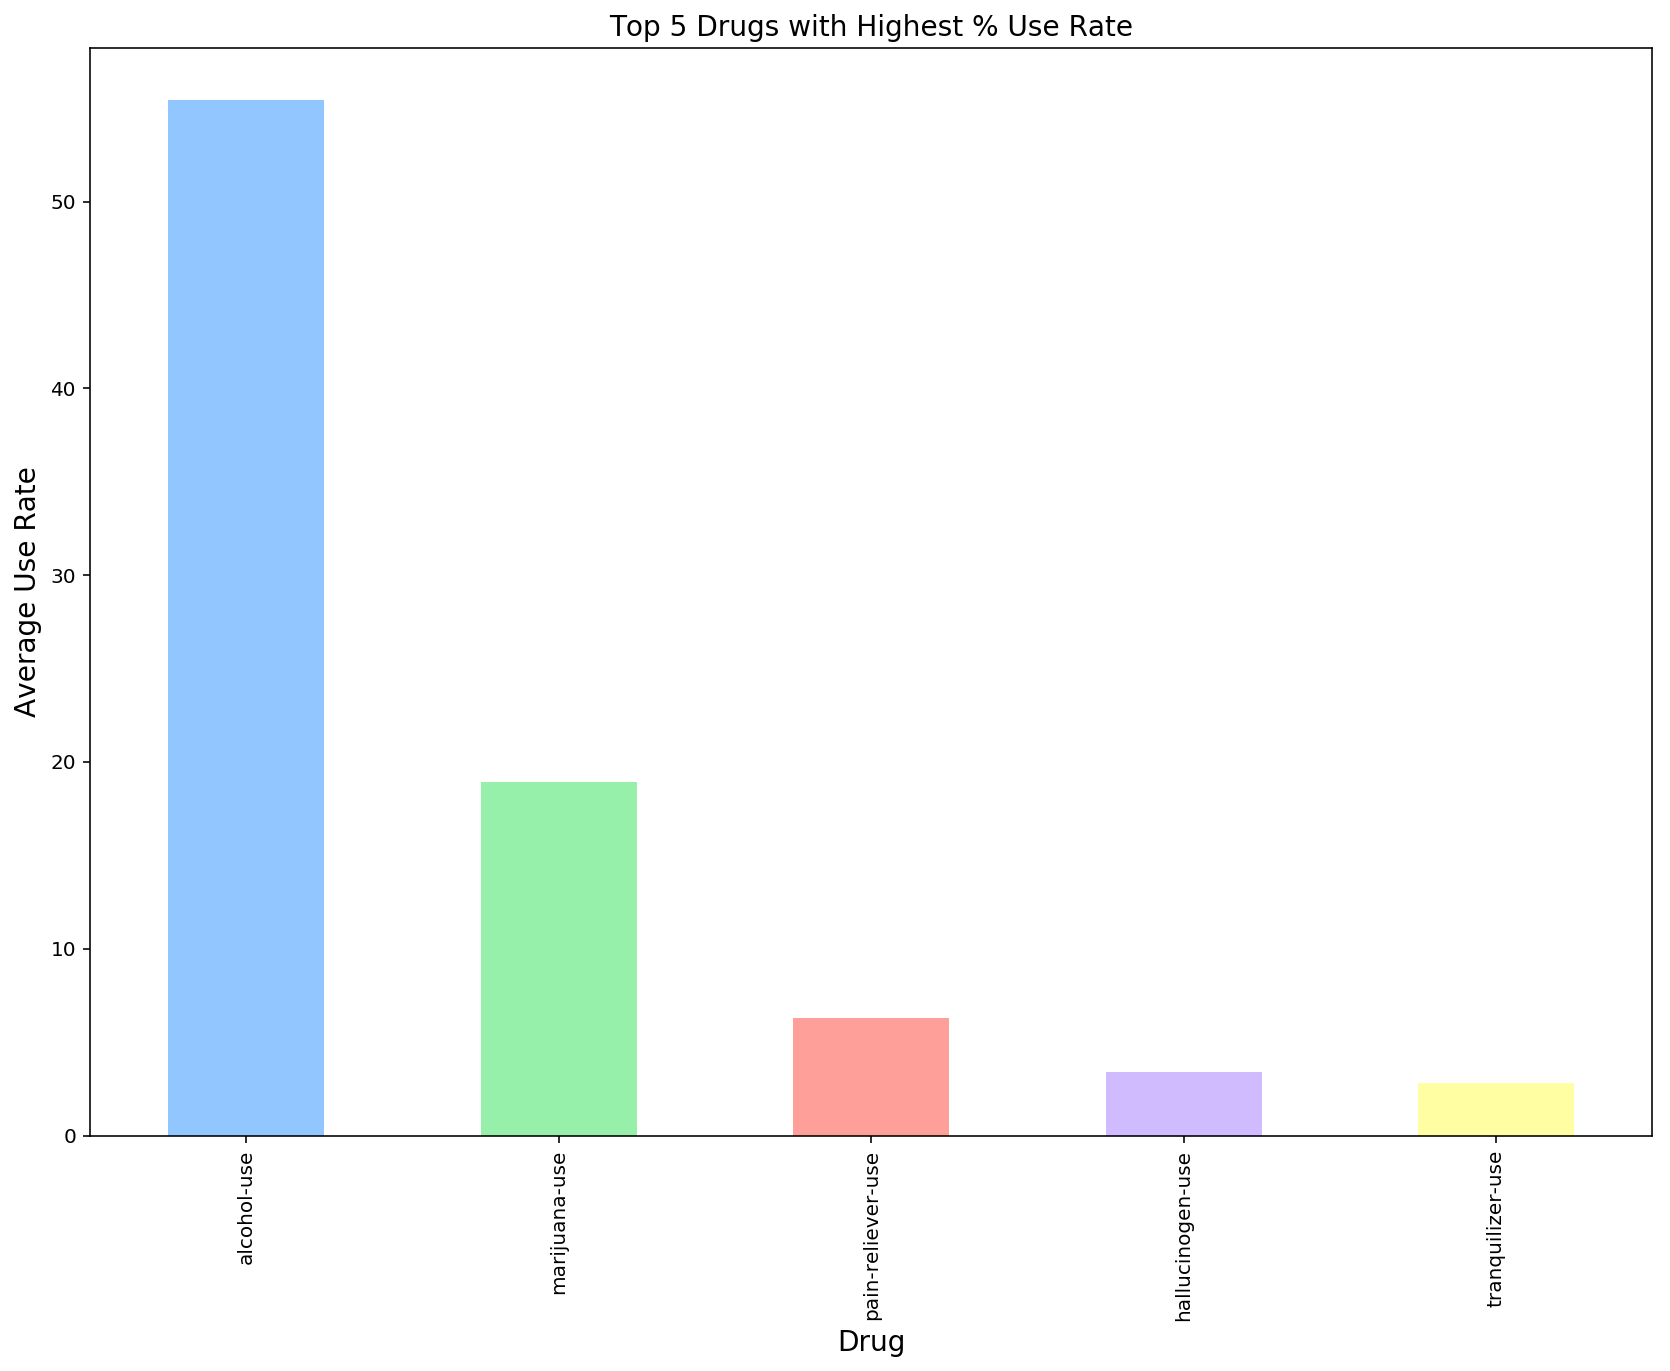

In [58]:
#We plotted the top 5 drugs with the highest average usage across age groups, of which marijuana is the drug with the 2nd
#highest percentage of users across the various age groups

drugs_use.mean().sort_values(axis=0,ascending=False).head(5).plot(kind='bar', figsize = (14,10))

#define titles and axis labels
plt.title('Top 5 Drugs with Highest % Use Rate',fontsize=14)
plt.ylabel('Average Use Rate', fontsize=14)
plt.xlabel('Drug',fontsize=14)

Text(0.5, 0, 'Drug')

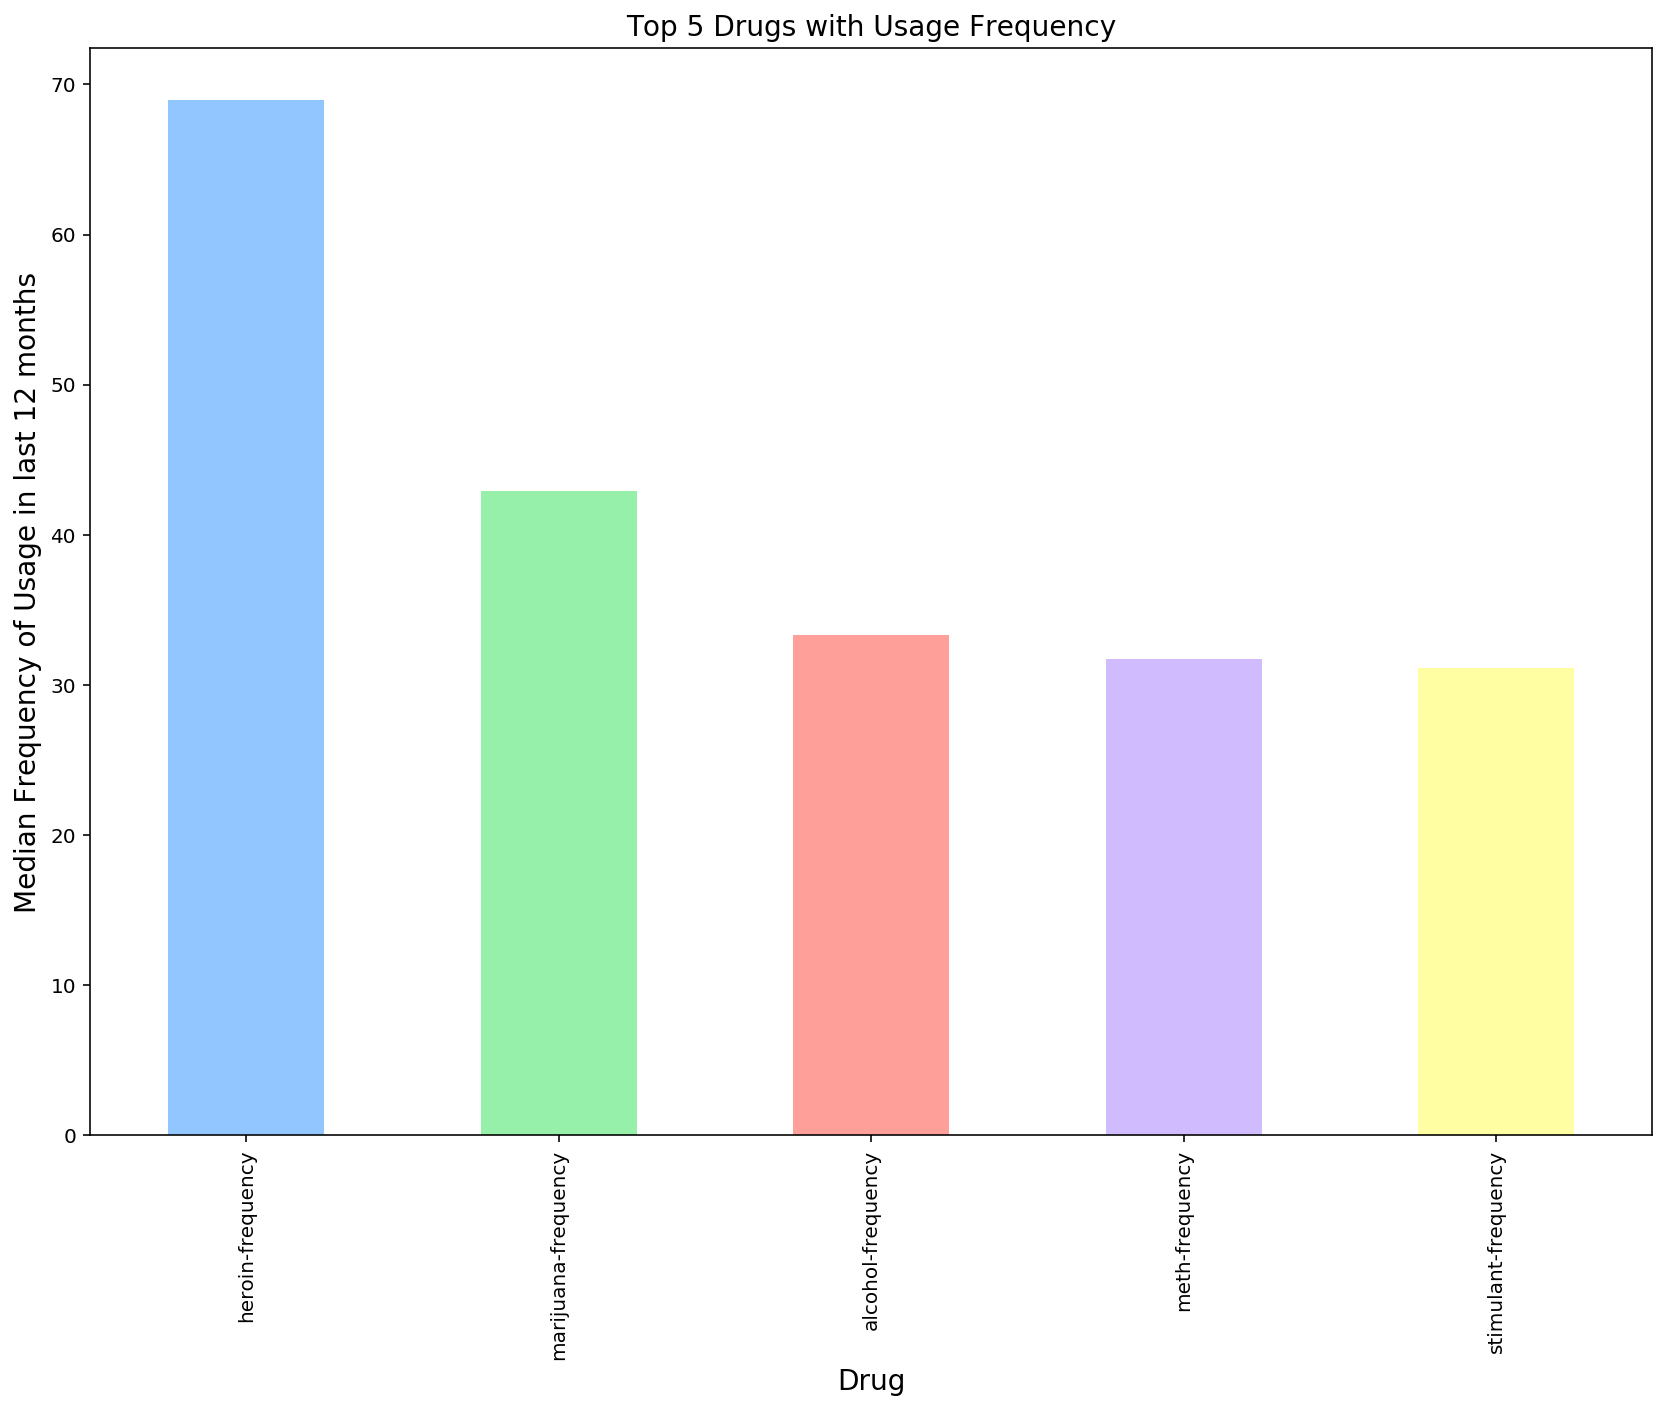

In [59]:
#We also plot the top 5 drugs with the highest usage frequency in the past 12 months averaged across all age groups
#Again, marijuana is the drug with the 2nd highest frequency of usage, which is cause for concern

drugs_freq.mean().sort_values(axis=0,ascending=False).head(5).plot(kind='bar', figsize = (14,10))

#define titles and axis labels
plt.title('Top 5 Drugs with Usage Frequency',fontsize=14)
plt.ylabel('Median Frequency of Usage in last 12 months', fontsize=14)
plt.xlabel('Drug',fontsize=14)


In [60]:
#To prepare our data, create subset of data to what we are interested in

drugs_sub = drugs[['age','n',
                   'marijuana-use','cocaine-use']]

#confirm the correlation coefficients between the two variables
drugs_sub.corr()

,n,marijuana-use,cocaine-use
n,1.000000,-0.169007,-0.021565
marijuana-use,-0.169007,1.000000,0.883789
cocaine-use,-0.021565,0.883789,1.000000


In [61]:
#create a new column that shows the number of users for both marijuana and cocaine

values_m = round(drugs_sub['n'] * (drugs_sub['marijuana-use']/100))
values_c = round(drugs_sub['n'] * (drugs_sub['cocaine-use']/100))

drugs_sub['marijuana-users'] = values_m
drugs_sub['cocaine-users'] = values_c

drugs_sub

C:\Users\Kai Hee\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Kai Hee\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


,age,n,marijuana-use,cocaine-use,marijuana-users,cocaine-users
0,12,2798,1.1,0.1,31.0,3.0
1,13,2757,3.4,0.1,94.0,3.0
2,14,2792,8.7,0.1,243.0,3.0
3,15,2956,14.5,0.5,429.0,15.0
4,16,3058,22.5,1.0,688.0,31.0
5,17,3038,28.0,2.0,851.0,61.0
6,18,2469,33.7,3.2,832.0,79.0
7,19,2223,33.4,4.1,742.0,91.0
8,20,2271,34.0,4.9,772.0,111.0
9,21,2354,33.0,4.8,777.0,113.0


As the variables can be seen as categorical i.e. people in the sampled group either used that drug or did not use that drug in the last 12 months, we can use the  𝜒2  test of independence. This test is appropriate when you have categorical data and want to evaluate whether or not two groups are significantly different.


Null Hypothesis (H0):  In the population, the two categorical variables are independent.

Alternative Hypothesis (H1): In the population, two categorical variables are dependent.

In [62]:
marijuana_users = drugs_sub['marijuana-users']
cocaine_users = drugs_sub['cocaine-users']

observations = [marijuana_users,cocaine_users]

results = stats.chi2_contingency(observations)

print("The chi squared statistic is", results[0])
print("The p-value is ", results[1])

The chi squared statistic is 151.64710315860827
The p-value is  3.697375154379783e-24


**Report**

As p<0.05, we reject the null hypothesis that the number of users of marijuana and the number of users of cocaine are independent. We conclude that they are dependent and that there is an association between the two variables.


<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 8. Introduction to dealing with outliers

---

Outliers are an interesting problem in statistics, in that there is not an agreed upon best way to define them. Subjectivity in selecting and analyzing data is a problem that will recur throughout the course.

1. Pull out the rate variable from the sat dataset.
2. Are there outliers in the dataset? Define, in words, how you _numerically define outliers._
3. Print out the outliers in the dataset.
4. Remove the outliers from the dataset.
5. Compare the mean, median, and standard deviation of the "cleaned" data without outliers to the original. What is different about them and why?

In [63]:
sat_rate = sat_scores['Rate']

sat_rate.describe()


count    52.000000
mean     37.153846
std      27.301788
min       4.000000
25%       9.000000
50%      33.500000
75%      63.500000
max      82.000000
Name: Rate, dtype: float64

Are there outliers in the dataset?

Define in words, how you numerically define outliers?

An outlier is an observation point that is distant from most of the other observations, which may be due to variability in the data or experimental error.



In [64]:
#detect the outliers using Inter-quartile range(IQR) score

Q1 = sat_scores.quantile(0.25)
Q3 = sat_scores.quantile(0.75)
IQR = Q3 - Q1

#the first item in quantile output gives us the value for 'Rate'
fence_low  = Q1[0]-1.5*IQR[0]
fence_high = Q3[0]+1.5*IQR[0]


#print out the outliers in the dataset

outliers = sat_scores.loc[(sat_scores['Rate'] < fence_low) | (sat_scores['Rate'] > fence_high)]
outliers.shape

#There are no outliers in the data in accordance to the IQR technique, thus we use percentile method instead

(0, 5)

In [65]:
percent95 = sat_scores.quantile(0.95)
percent5 = sat_scores.quantile(0.05)

print(percent95[0])

outliers = sat_scores.loc[(sat_scores['Rate'] < percent5[0]) | (sat_scores['Rate'] > percent95[0])]
outliers.head()

77.89999999999999


,State,Rate,Verbal,Math,Verbal - Math
0,CT,82,509,510,-1
1,NJ,81,499,513,-14
2,MA,79,511,515,-4
48,SD,4,577,582,-5
49,ND,4,592,599,-7


In [66]:
#remove the outliers

sat_scores.drop(sat_scores.index[0:3],axis=0,inplace=True)

Compare the mean, median, and standard deviation of the "cleaned" data without outliers to the original. What is different about them and why?

In [67]:
# find the mean, median and standard deviation of the "cleaned" data

sat_rate = sat_scores['Rate']

sat_rate.describe()

count    49.000000
mean     34.489796
std      25.812725
min       4.000000
25%       9.000000
50%      31.000000
75%      57.000000
max      77.000000
Name: Rate, dtype: float64

The mean is lower, the median is lower and the standard deviation is lower.

As outliers, which are values that are far away from most of the other values, were removed, the standard deviation would definitely decrease as standard deviation is a measure of how dispersed a set of data values are.

The mean and median are lower as there were more values that were too "high" that were removed than values that were too "low".

<img src="http://imgur.com/GCAf1UX.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 9. Percentile scoring and spearman rank correlation

---

### 9.1 Calculate the spearman correlation of sat `Verbal` and `Math`

1. How does the spearman correlation compare to the pearson correlation? 
2. Describe clearly in words the process of calculating the spearman rank correlation.
  - Hint: the word "rank" is in the name of the process for a reason!


ANS: Spearman correlation coefficients measure monotonic relationships, while Pearson correlation coefficients measure linear relationships.

The Spearman correlation evaluates the monotonic relationship between two continuous or ordinal variables. In a monotonic relationship, the variables tend to change together, but not necessarily at a constant rate. The Spearman correlation coefficient is based on the ranked values for each variable rather than the raw data.


In [68]:
sat_scores[['Verbal','Math']].corr(method='spearman')

,Verbal,Math
Verbal,1.000000,0.917761
Math,0.917761,1.000000


### 9.2 Percentile scoring

Look up percentile scoring of data. In other words, the conversion of numeric data to their equivalent percentile scores.

http://docs.scipy.org/doc/numpy-dev/reference/generated/numpy.percentile.html

http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.percentileofscore.html

1. Convert `Rate` to percentiles in the sat scores as a new column.
2. Show the percentile of California in `Rate`.
3. How is percentile related to the spearman rank correlation?

In [69]:
#extract data from Rate column out as a numpy array

rate_array = sat_scores['Rate'].values

#convert Rate to percentiles in the sat scores as a new column

rate_perc = np.percentile(rate_array,100)

sat_scores['Percentile'] = rate_perc

sat_scores

,State,Rate,Verbal,Math,Verbal - Math,Percentile
3,NY,77,495,505,-10,77.0
4,NH,72,520,516,4,77.0
5,RI,71,501,499,2,77.0
6,PA,71,500,499,1,77.0
7,VT,69,511,506,5,77.0
8,ME,69,506,500,6,77.0
9,VA,68,510,501,9,77.0
10,DE,67,501,499,2,77.0
11,MD,65,508,510,-2,77.0
12,NC,65,493,499,-6,77.0


### 9.3 Percentiles and outliers

1. Why might percentile scoring be useful for dealing with outliers?
2. Plot the distribution of a variable of your choice from the drug use dataset.
3. Plot the same variable but percentile scored.
4. Describe the effect, visually, of coverting raw scores to percentile.

1) Data points are very high or low percentiles (e.g. 5% and 95% percentile) can help us to identify outliers.

In [70]:
#Plot the distribution of a variable of your choice from the drug use dataset.